# Initialisation & Setup

### Importing core libraries necessary for the case study

In [1691]:
# Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Using Seaborn's aesthetic theme
sns.set_theme()

### Loading Data from CSV file

In [1692]:
raw_loans = pd.read_csv('loan.csv', dtype={47:str}, low_memory=False)

# number of rows and columns
print("Number of rows: ", len(raw_loans))
print("Number of Columns: ", len(raw_loans.columns))

raw_loans.head()

Number of rows:  39717
Number of Columns:  111


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning & Manipulation

## Fixing Rows & Columns

### Row Clean Up
> Removing loans that are still in progress ( 'loan_status' = 'Current' )

In [1693]:
loans = raw_loans[raw_loans['loan_status'] != 'Current']
loans.shape

(38577, 111)

### Columns Clean Up 

#### Checking columns with NA or Null values

In [1694]:
loans.columns[loans.isna().all()]

Index(['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
     

In [1695]:
print(len(loans.columns[loans.isna().all()]), "columns have NA values in all rows, these columns can be dropped")

55 columns have NA values in all rows, these columns can be dropped


##### Dropping columns with all NA or Null values

In [1696]:
loans = loans.dropna(axis=1, how='all')

# Left with columns data
print("Columns left: ", len(loans.columns))

Columns left:  56


#### Checking columns with constant values

In [1697]:
loans.columns[loans.nunique() == 1]

Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

In [1698]:
unique_value_cols = loans.columns[loans.nunique() == 1]

print(len(unique_value_cols), "columns have only one unique value, these columns can be dropped as they do not provide any useful information")

11 columns have only one unique value, these columns can be dropped as they do not provide any useful information


##### Dropping columns with all same values

In [1699]:
loans = loans.drop(unique_value_cols, axis=1)

# Left with columns data
print("Columns left: ", len(loans.columns))

Columns left:  45


### Dropping Columns

In [1700]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status   

In [1701]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [1702]:
for column in loans.columns:
    unique_count = loans[column].nunique()
    print(f"{column} : {unique_count}")

id : 38577
member_id : 38577
loan_amnt : 870
funded_amnt : 1019
funded_amnt_inv : 8050
term : 2
int_rate : 370
installment : 15022
grade : 7
sub_grade : 35
emp_title : 28027
emp_length : 11
home_ownership : 5
annual_inc : 5215
verification_status : 3
issue_d : 55
loan_status : 2
url : 38577
desc : 25803
purpose : 14
title : 19297
zip_code : 822
addr_state : 50
dti : 2853
delinq_2yrs : 11
earliest_cr_line : 524
inq_last_6mths : 9
mths_since_last_delinq : 95
mths_since_last_record : 111
open_acc : 40
pub_rec : 5
revol_bal : 21275
revol_util : 1088
total_acc : 82
total_pymnt : 36714
total_pymnt_inv : 36387
total_rec_prncp : 6841
total_rec_int : 34025
total_rec_late_fee : 1320
recoveries : 4040
collection_recovery_fee : 2616
last_pymnt_d : 101
last_pymnt_amnt : 34418
last_credit_pull_d : 106
pub_rec_bankruptcies : 3


#### Now we have 45 columns out of which we have some columns not useful for the analysis
Columns such as 
- 'desc', 'title', doesn't contribute to loan defaulting in any way. So excluding them from analysis.
- 'id', 'member_id' consists of unique values, which means we don't have multiple loan applications for the same person. Since both pair of values in the columns represent the same person. So we can use any one of the column as an index. Hence dropping the later.
- 'emp_title' has 28,027 unique values out of 38,577 total values. So it doesn't contribute usefully to the analysis. So dropping that.
- 'mths_since_last_delinq', 'mnths_since_last_record' has >60% missing values, so dropping them.
- 'collection_recovery_fee', 'last_pymnt_amnt', 'last_pymnt_d', 'recoveries', 'revol_bal', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_credit_pull_d', 'earliest_cr_line' refer to behavoural data of a customer post loan approval. The data is not available at the time of loan approval and thus cannot be used for analysis. Hence the said columns are dropped.
- 'funded_amnt_inv', 'total_pymnt_inv' is useful for investors but doesn't contribute for analysing loan defaulter , so droping them.
- 'url' is a static link with id as the attribute. It's a redundant column. Hence dropping that
- Among 'zip_code', 'addr_state' any one of them can be used for analysis based on location, so dropping the former.

In [1703]:
loans = loans.drop(['member_id', 'url', 'desc', 'title', 'emp_title', 
                    'zip_code', 'mths_since_last_delinq', 'mths_since_last_record', 
                    'collection_recovery_fee', 'last_pymnt_amnt', 'last_pymnt_d', 
                    'recoveries', 'revol_bal', 'total_rec_prncp', 'total_rec_int', 
                    'total_rec_late_fee', 'last_credit_pull_d', 'earliest_cr_line', 
                    'funded_amnt_inv', 'total_pymnt_inv'], axis=1)
loans.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,AZ,27.65,0,1,3,0,83.70%,9,5863.155187,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,GA,1.00,0,5,3,0,9.40%,4,1008.710000,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,IL,8.72,0,2,2,0,98.50%,10,3005.666844,0.0
3,1076863,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,CA,20.00,0,1,10,0,21%,37,12231.890000,0.0
5,1075269,5000,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,...,AZ,11.20,0,3,9,0,28.30%,12,5632.210000,0.0


In [1704]:
loans.shape

(38577, 25)

In [1705]:
loans.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'total_pymnt',
       'pub_rec_bankruptcies'],
      dtype='object')

### Checking for missing values

In [1706]:
missing = (loans.isna().sum()/len(loans.index))*100
missing[missing>0]

emp_length              2.677761
revol_util              0.129611
pub_rec_bankruptcies    1.806776
dtype: float64

In [1707]:
missing = loans.isna().sum()
missing[missing>0]

emp_length              1033
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

In [1708]:
loans['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

#### Handling Missing Values
> Columns with missing values are 'emp_length', 'revol_util', 'pub_rec_bankruptcies' .
<br>
> Let's see what type of data each column has

In [1709]:
loans[['emp_length', 'revol_util', 'pub_rec_bankruptcies']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   emp_length            37544 non-null  object 
 1   revol_util            38527 non-null  object 
 2   pub_rec_bankruptcies  37880 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


##### 'emp_length' :

In [1710]:
print("Mode : ", loans['emp_length'].mode()[0])
loans['emp_length'].value_counts()

Mode :  10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

> The above value counts shows that the mode value has higher frequency than that of the next most frequent value.
<br>
<br>
> Since the missing values are in a very low percentage, imputing the missing values with the mode of the existing 'emp_length' values doesn't effect the analysis much, given the nature of the missing data.
<br>
> Hence assigning the mode to the null values in the column 'emp_length'

In [1711]:
loans['emp_length'].fillna(loans['emp_length'].mode()[0], inplace = True)
loans['emp_length'].isna().sum()

0

In [1712]:
missing = (loans.isna().sum()/len(loans.index))*100
missing[missing>0]

revol_util              0.129611
pub_rec_bankruptcies    1.806776
dtype: float64

##### 'revol_util' :

In [1713]:
# Standardising the values in 'revol_util' column
loans['revol_util'] = loans['revol_util'].str.rstrip('%').astype('float')

In [1714]:
loans['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

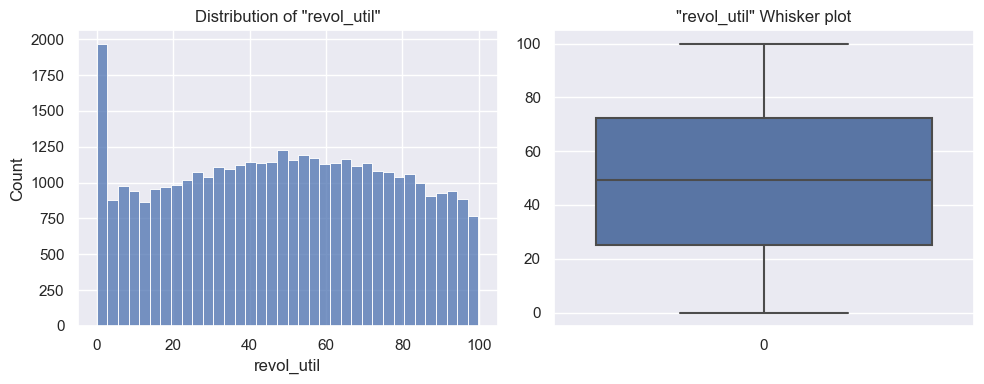

In [1715]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plotting the displot on the first subplot
sns.histplot(loans['revol_util'], ax=ax1)
ax1.set_title('Distribution of "revol_util"')

# Plotting the boxplot on the second subplot
sns.boxplot(loans['revol_util'], ax=ax2)
ax2.set_title('"revol_util" Whisker plot')

plt.tight_layout()

plt.show()

In order to preserve the overall distribution shape and minimize potential bias, imputing the missing values of 'revol_util' with the median value of the column.

In [1716]:
loans['revol_util'].fillna(loans['revol_util'].median(), inplace = True)
loans['revol_util'].isna().sum()

0

##### 'pub_rec_bankruptcies' :
> If borrowers with missing 'pub_rec_bankruptcies' values tend to have a higher likelihood of bankruptcy, imputing these missing values with, for example, mode, may underestimate the true number of bankruptcies in the dataset. This can lead to an inaccurate representation of the borrowers' creditworthiness.
<br>

> Considering the potential impact of imputation and the nature of missing data, it is appropriate to drop the rows with missing values in this column

In [1717]:
loans = loans[~loans['pub_rec_bankruptcies'].isna()]
loans['pub_rec_bankruptcies'].isna().sum()

0

In [1718]:
missing = loans.isna().sum()
print("Columns with missing values: ", missing[missing>0].count())

Columns with missing values:  0


In [1719]:
loans.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,AZ,27.65,0,1,3,0,83.7,9,5863.155187,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,GA,1.00,0,5,3,0,9.4,4,1008.710000,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,IL,8.72,0,2,2,0,98.5,10,3005.666844,0.0
3,1076863,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,CA,20.00,0,1,10,0,21.0,37,12231.890000,0.0
5,1075269,5000,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,...,AZ,11.20,0,3,9,0,28.3,12,5632.210000,0.0


In [1720]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37880 entries, 0 to 39680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37880 non-null  int64  
 1   loan_amnt             37880 non-null  int64  
 2   funded_amnt           37880 non-null  int64  
 3   term                  37880 non-null  object 
 4   int_rate              37880 non-null  object 
 5   installment           37880 non-null  float64
 6   grade                 37880 non-null  object 
 7   sub_grade             37880 non-null  object 
 8   emp_length            37880 non-null  object 
 9   home_ownership        37880 non-null  object 
 10  annual_inc            37880 non-null  float64
 11  verification_status   37880 non-null  object 
 12  issue_d               37880 non-null  object 
 13  loan_status           37880 non-null  object 
 14  purpose               37880 non-null  object 
 15  addr_state         

### Standardizing Data

int_rate have '%' symbol values and having data type of object. Let's remove % at the end and convert to float

In [1721]:
#stripping '%' value
loans['int_rate'] = loans['int_rate'].str.rstrip('%').astype('float')

issue_d contains date values, let's convert column data type to date.

In [1722]:
loans['issue_d'] = pd.to_datetime(loans['issue_d'], format='%b-%y')

For emp_length 
- < 1 year is assumed as 0
- 10+ years is assumed as 10 

In [1723]:
loans['emp_length'] = loans['emp_length'].apply( lambda x: 0 if "<" in x else ( int(x.split('+')[0]) if "+" in x else (int(x.split()[0])) ) )

In [1724]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37880 entries, 0 to 39680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    37880 non-null  int64         
 1   loan_amnt             37880 non-null  int64         
 2   funded_amnt           37880 non-null  int64         
 3   term                  37880 non-null  object        
 4   int_rate              37880 non-null  float64       
 5   installment           37880 non-null  float64       
 6   grade                 37880 non-null  object        
 7   sub_grade             37880 non-null  object        
 8   emp_length            37880 non-null  int64         
 9   home_ownership        37880 non-null  object        
 10  annual_inc            37880 non-null  float64       
 11  verification_status   37880 non-null  object        
 12  issue_d               37880 non-null  datetime64[ns]
 13  loan_status     

In [1725]:
loans['delinq_2yrs'].value_counts()

0     33786
1      3138
2       655
3       204
4        58
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

## Outlier Treatment


#### Outlier Removal Common Functions

In [1726]:
def outlier_filter(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 *IQR
    lower_bound = Q1 - 1.5 * IQR

    filter = (df[column] >= lower_bound) & (df[column] <= upper_bound)

    return filter

# The function treat outliers, prints a box plot for each column under consideration
# Plot 1 = Before outlier treatment
# Plot 2 = Post outlier treatment
# Also prints statistics of how many rows and percentage of rows dropped
def outlier_comparison(df, column):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))

    # box plot before dropping outliers
    sns.boxplot(df[column], ax=ax1, orient="h")
    ax1.set_title(column + ' - Original')
    
    new_df = df[outlier_filter(df, column)]

    # box plot after dropping outliers    
    sns.boxplot(new_df[column], ax=ax2, orient="h")
    ax2.set_title(column + ' - Post Outlier Treatment')

    # plt.tight_layout()
    
    plt.show()


def remove_outliers(df, column):

    # Q1 = df[column].quantile(0.25)
    # Q3 = df[column].quantile(0.75)
    # IQR = Q3 - Q1
    # upper_bound = Q3 + 1.5 *IQR
    # lower_bound = Q1 - 1.5 * IQR

    # filter = (df[column] >= lower_bound) & (df[column] <= upper_bound)

    old_rows = len(df)

    # new_df = df[filter]

    new_df = df[outlier_filter(df, column)]

    new_rows = len(new_df)

    print('Rows dropped: ', old_rows - new_rows)
    print('Percentage rows dropped: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    
    return new_df


#### Removing outliers
Columns to remove outliers on:
 - loan_amnt
 - funded_amnt
 - annual_inc
 - int_rate
 - installment ?

We will use the IQR method to remove outliers

which means we will remove any values that are below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where IQR = Q3 - Q1

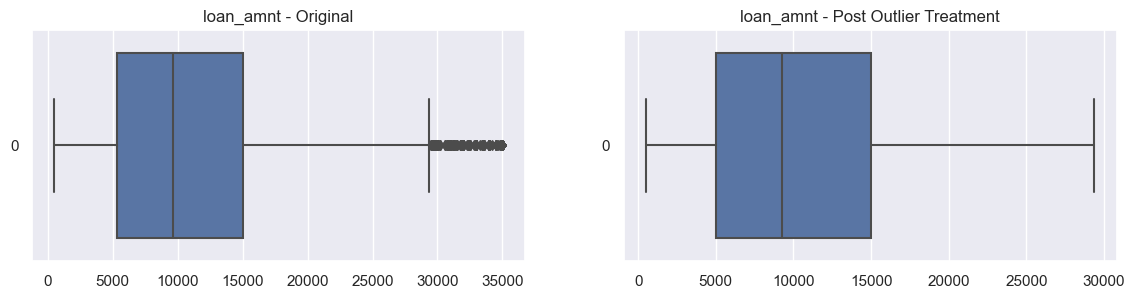

Rows dropped:  1092
Percentage rows dropped:  2.88 %


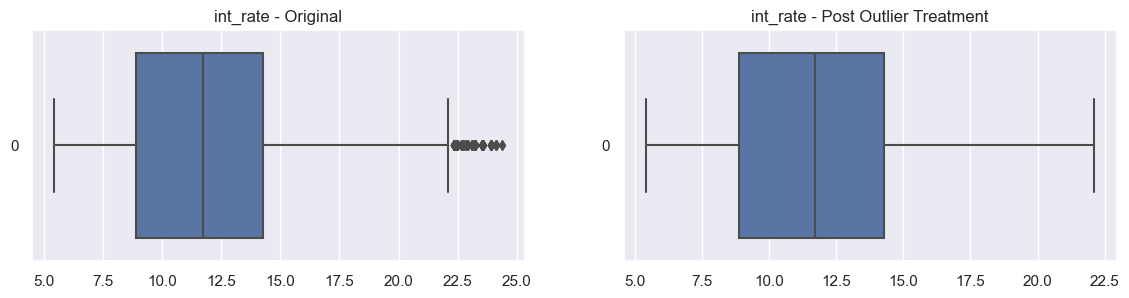

Rows dropped:  66
Percentage rows dropped:  0.18 %


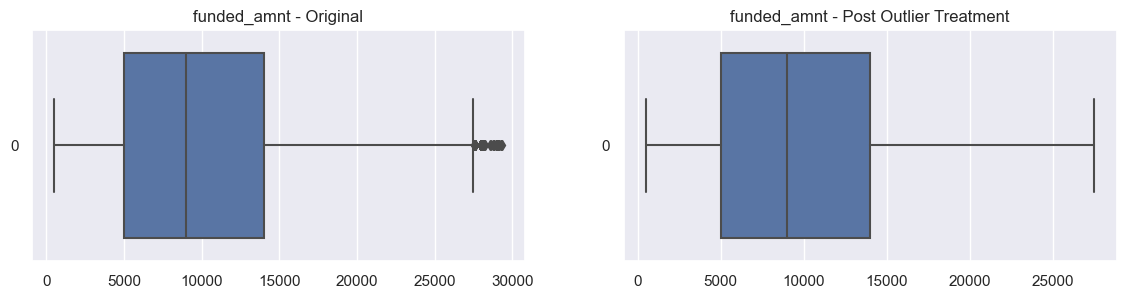

Rows dropped:  169
Percentage rows dropped:  0.46 %


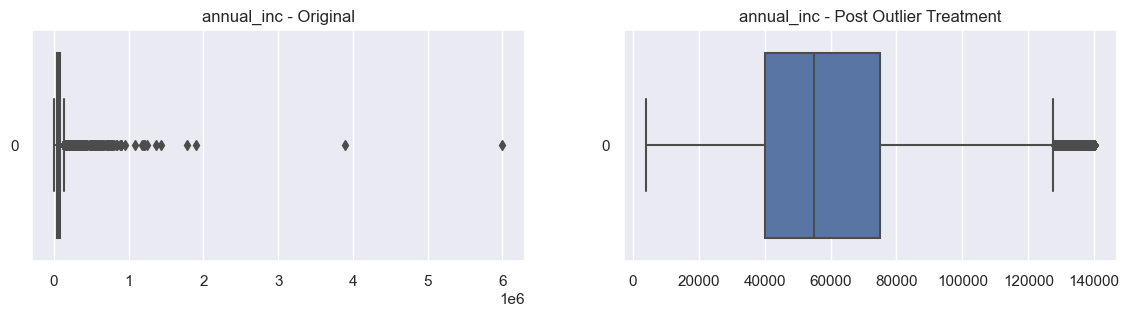

Rows dropped:  1578
Percentage rows dropped:  4.32 %


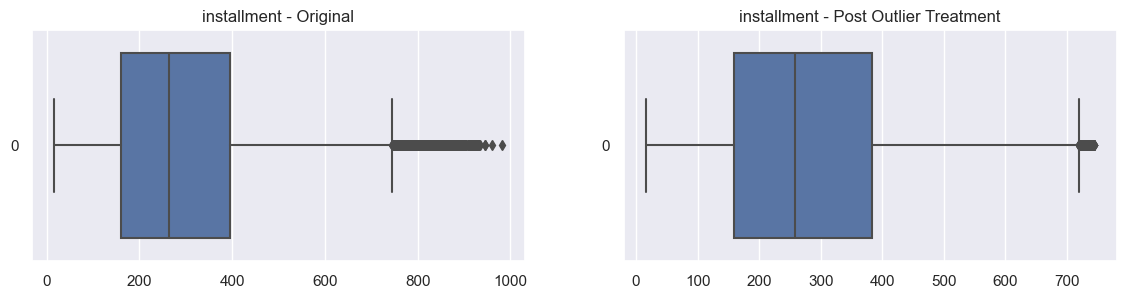

Rows dropped:  864
Percentage rows dropped:  2.47 %


In [1727]:
raw_raw_count = len(raw_loans)

# list of columns for outlier treatment
outlier_list = ['loan_amnt', 'int_rate', 'funded_amnt', 'annual_inc', 'installment']

# show_box_plot(loans, column_list)
for column in outlier_list:
    outlier_comparison(loans, column)
    loans = remove_outliers(loans, column)


In [1728]:
# calculate percentage of data removed
print("Percentage of data removed: ", round((1 - len(loans)/raw_raw_count) * 100, 2), "%")

Percentage of data removed:  14.11 %


## Derived Columns

#### Adding the following columns :
- 'default' - for loan status (0 = not default, 100 = default)
- 'term_num' - for loan term (0 = 36 months, 1 = 60 months)
- 'grade_num' - for loan grade (A-G)
- 'sub_grade_num' - for loan subgrade (1-5)
- 'issue_month' - for loan issue month (1-12)
- 'issue_year' - for loan issue year (2007-2015)
- 'issue_quater' - for loan issue quarter (Q1-Q4)


In [1729]:
# add a new column to indicate if the loan is fully paid or not ( 0 - fully paid, 100 - defaulted)
# defaulted is set to 100 to make it easier to calculate the percentage of loans that are defaulted
loans['default'] = np.where(loans['loan_status'].isin(['Fully Paid']), 0, 100)

loans['term_num'] = loans['term'].apply(lambda x: int(x.split()[0]))


loans['issue_month'] = loans['issue_d'].dt.month
loans['issue_year'] = loans['issue_d'].dt.year
loans['issue_quarter'] = loans['issue_d'].dt.to_period('Q').astype(str).str.replace('Q', 'Q-').str[4:]

# convert loan grade to numeric
loans['grade_num'] = loans['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

# convert loan sub grade to numeric
loans['sub_grade_num'] = loans['sub_grade'].map({'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
                                                    'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
                                                    'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
                                                    'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
                                                    'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
                                                    'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
                                                    'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35})

In [1730]:
import numpy_financial as npf

def calc_interest_rate(row):
    return (npf.rate(row['term_num'], row['installment'], -row['funded_amnt'], 0) * 12 * 100).round(2)

loans['total_amount_to_pay'] = loans['installment'] * loans['term_num']
loans['total_interest'] = loans['total_amount_to_pay'] - loans['funded_amnt']
loans['total_loss'] = loans.apply(lambda x: (x['total_pymnt'] - x['total_amount_to_pay']) if x['default'] == 100 else 0, axis=1)
loans['loss_percentage'] = (loans['total_loss'] / loans['total_amount_to_pay'] * 100).abs().round(2)

loans['calc_interest_rate'] = loans.apply(calc_interest_rate, axis=1)

# Understanding the data and Univariate Analysis

To confirm the understanding of the loan amount and interest rate, the following check is made:
```
Check if the calculated interest rate on total amount to pay (installment * term) is equal to the provided interest rate within a reasonable margin of error (0.1%)
The margin of error could arise by different interest calculation methods, and rounding
```

Only 9 rows seem to be not correct, this could happen due to mid term changes in interest rate or any other reason. The rows are removed from the dataset.

In [1731]:
# print rows where calc_interest_rate is not equal to int_rate within 0.1% tolerance
print("Number of loans that are not within the tolerance", len(loans[(loans['calc_interest_rate'] - loans['int_rate']).abs() > 0.1]))

# drop rows where calc_interest_rate is not equal to int_rate within 0.1% tolerance
loans = loans[(loans['calc_interest_rate'] - loans['int_rate']).abs() <= 0.1]

Number of loans that are not within the tolerance 9


In [1732]:
# avg loss percentage for defaulted loans
print("Average loss percentage for defaulted loans: ", (loans['loss_percentage'].mean()).round(2), '%')

# total funded loan amount
total_funded_amount = loans['funded_amnt'].sum()
print("Total funded loan amount: $", f"{total_funded_amount.round(0):,}")

# total recovered amount
total_recovered_amount = loans['total_pymnt'].sum()
print("Total recovered amount: $", f"{total_recovered_amount.round(0):,}")

Average loss percentage for defaulted loans:  8.01 %
Total funded loan amount: $ 324,305,600
Total recovered amount: $ 355,807,051.0


In [1733]:
loans.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'total_pymnt',
       'pub_rec_bankruptcies', 'default', 'term_num', 'issue_month',
       'issue_year', 'issue_quarter', 'grade_num', 'sub_grade_num',
       'total_amount_to_pay', 'total_interest', 'total_loss',
       'loss_percentage', 'calc_interest_rate'],
      dtype='object')

## Univariate Analysis

In [1734]:
# Column metadata used by functions below
column_titles = {
    'id': 'User ID',
    'delinq_2yrs': 'Delinquency in past 2 years',
    # above newly added
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income', 
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Public Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    # 'loan_amnt_b': 'Loan Amount Bins',
    # 'funded_amnt_inv_b': 'Investor Funded Bins',
    # 'funded_amnt_b': 'Funded Amount Bins',
    # 'annual_inc_b': 'Annual Income Bins',
    # 'int_rate_b': 'Interest Rate Bins',
    # 'dti_b': 'DTI Bins'
}

#### Common Functions

In [1735]:
def univariate_analysis(df, column):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))
    ax1 = sns.histplot(df[column], kde=True, ax=ax1)
    # g = sns.displot(df[column], kde=True, kind='hist')
    sns.boxplot(x=column, data=df, ax=ax2)
    # g.set_axis_labels(column_titles[column], "Frequency")
    ax1.set_xlabel(column_titles[column])
    ax2.set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()

#### Loan Amount (Quantitative Variable Analysis)

Majority of the loan_amnt is in the range \$5000 and \$14000, and the median amount is \$9000.

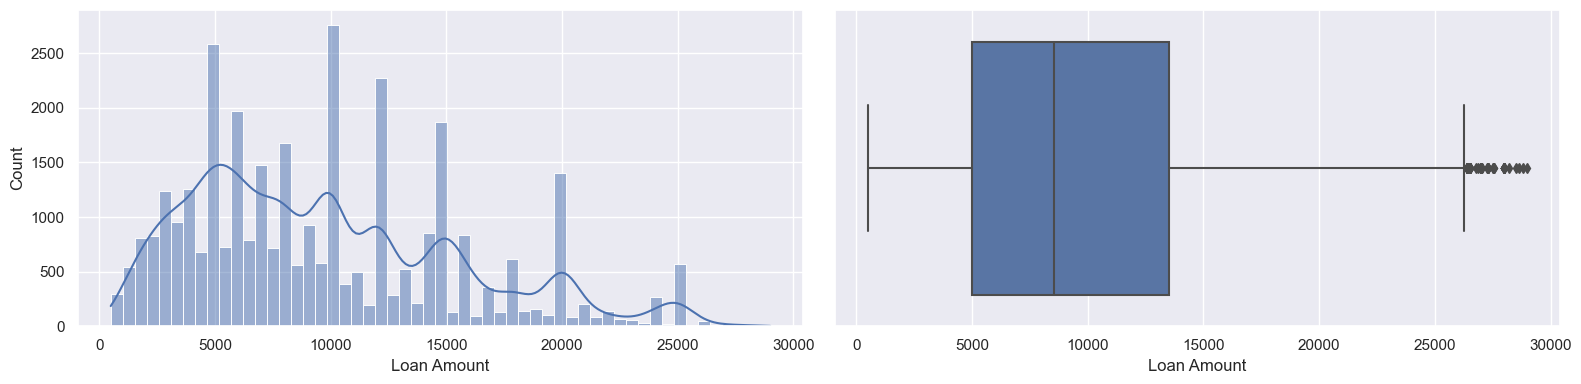

In [1736]:
univariate_analysis(loans, 'loan_amnt')

In [1737]:
loans['loan_amnt'].describe()

count    34102.000000
mean      9734.656325
std       5787.850785
min        500.000000
25%       5000.000000
50%       8562.500000
75%      13500.000000
max      29000.000000
Name: loan_amnt, dtype: float64

#### Funded Amount (Quantitative Variable Analysis)
Similar to loan_amnt, majority of the funded_amnt is also in the range \$5000 and \$14000, and the median amount is \$8875.

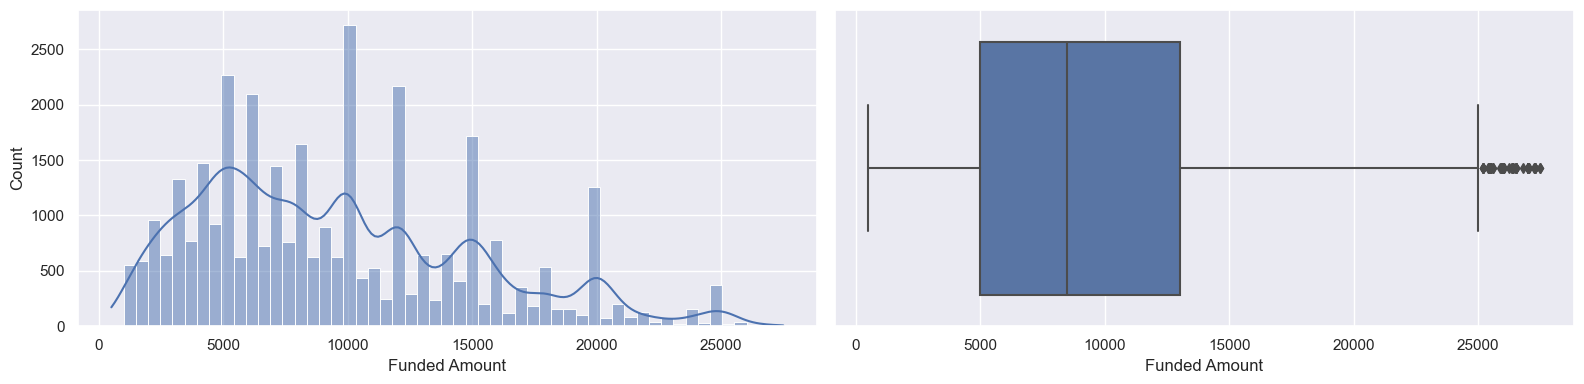

In [1738]:
univariate_analysis(loans, 'funded_amnt')

In [1739]:
# show percentiles for annual_inc
print("Percentiles for funded amount: ")
print(loans['funded_amnt'].describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99]))

# show median for funded_amnt
print("Median for funded amount: ", loans['funded_amnt'].median())

Percentiles for funded amount: 
count    34102.000000
mean      9509.870389
std       5541.661526
min        500.000000
1%        1200.000000
5%        2100.000000
10%       3000.000000
25%       5000.000000
50%       8475.000000
75%      13000.000000
90%      18000.000000
95%      20000.000000
99%      25000.000000
max      27500.000000
Name: funded_amnt, dtype: float64
Median for funded amount:  8475.0


#### Annual Income

Income of most borrowers is between \$40,000 and \$75,000. The median is \$55,000.

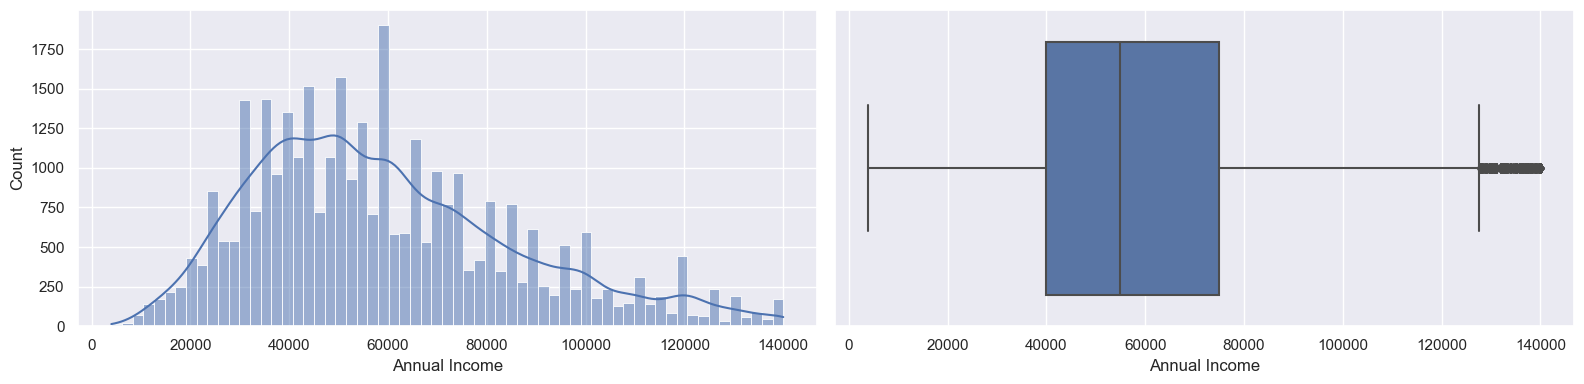

In [1740]:
univariate_analysis(loans, 'annual_inc')

In [1741]:
loans['annual_inc'].describe()

count     34102.000000
mean      59306.601302
std       26978.877653
min        4000.000000
25%       39996.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [1742]:
# show percentiles for annual_inc
print("Percentiles for annual income: ")
print(loans['annual_inc'].describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99]))

# show median for annual_inc
print("Median for annual income: ", loans['annual_inc'].median())

Percentiles for annual income: 
count     34102.000000
mean      59306.601302
std       26978.877653
min        4000.000000
1%        14400.000000
5%        23461.200000
10%       28800.000000
25%       39996.000000
50%       55000.000000
75%       75000.000000
90%       98695.200000
95%      113800.000000
99%      132000.000000
max      140000.000000
Name: annual_inc, dtype: float64
Median for annual income:  55000.0


#### Interest Rate

The interest rate is usually between 6% and 15%. The median is ~12%.

There is a big spike for 7.5% as this could be the default interest rate for good loans usually in the market at that time.

There is a gap between 8% and 10% which could mean there is a clear difference between the interest rate for good loans and non good loans.

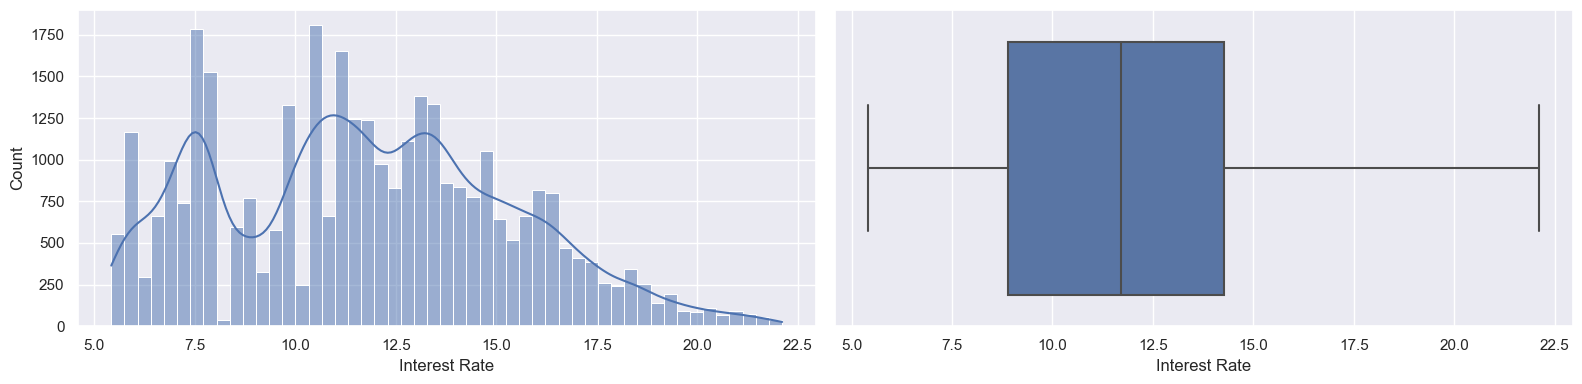

In [1743]:
univariate_analysis(loans, 'int_rate')

In [1744]:
loans['int_rate'].describe()

count    34102.000000
mean        11.752129
std          3.600386
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [1745]:
# show percentiles for int_rate
print("Percentiles for interest rate: ")
print(loans['int_rate'].describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99]))

# show median for int_rate_num
print("Median for interest rate: ", loans['int_rate'].median())

Percentiles for interest rate: 
count    34102.000000
mean        11.752129
std          3.600386
min          5.420000
1%           5.420000
5%           6.030000
10%          6.990000
25%          8.900000
50%         11.710000
75%         14.260000
90%         16.490000
95%         17.930000
99%         20.300000
max         22.110000
Name: int_rate, dtype: float64
Median for interest rate:  11.71


### Installment

Majority of 'installment' amount is in the range of \$150 - \$400

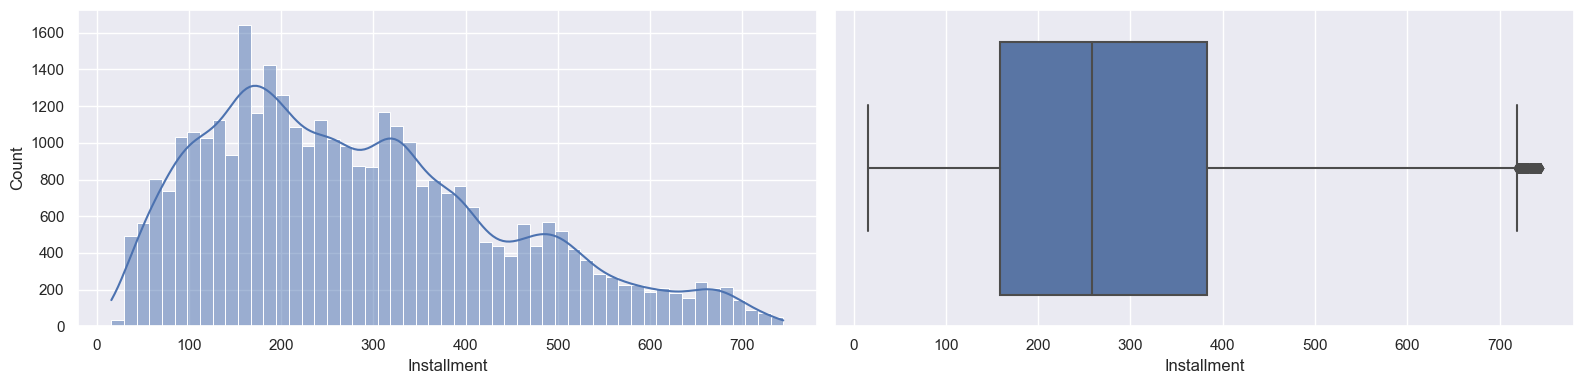

In [1746]:
univariate_analysis(loans, 'installment')

In [1747]:
loans['installment'].describe()

count    34102.000000
mean       283.722078
std        159.785964
min         16.080000
25%        159.102500
50%        258.040000
75%        382.965000
max        744.260000
Name: installment, dtype: float64

### Debt-to-Income

Majority of the debt to income ratio is in the range 8 to 19

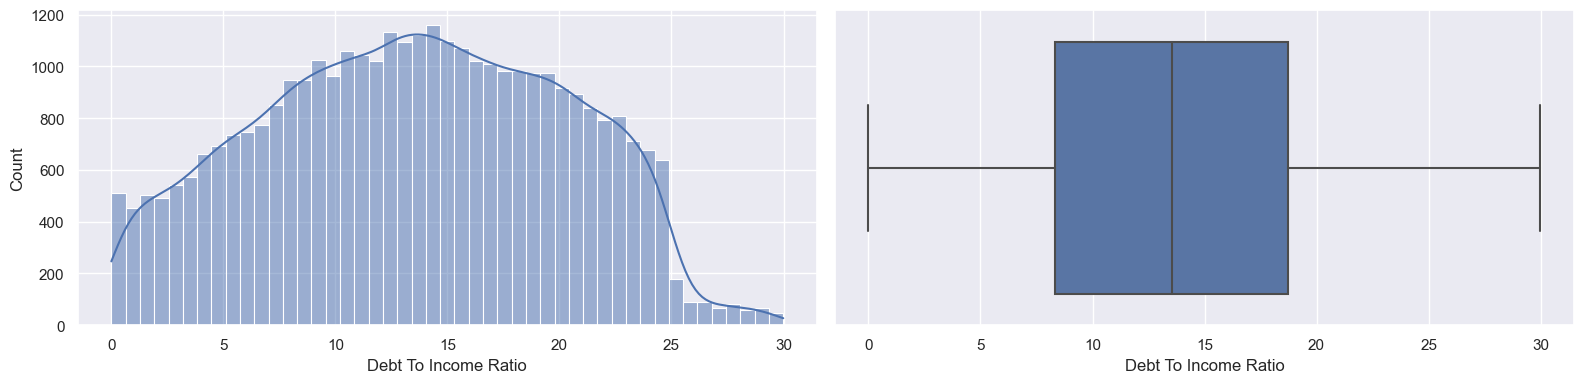

In [1748]:
univariate_analysis(loans, 'dti')

In [1749]:
loans['dti'].describe()

count    34102.000000
mean        13.444348
std          6.666669
min          0.000000
25%          8.330000
50%         13.550000
75%         18.730000
max         29.990000
Name: dti, dtype: float64

# Unordered Categorical Variable Analysis

### Home Ownership
Majority of the home owners are having their homes either in the form of RENT or MORTGAGE

<Axes: >

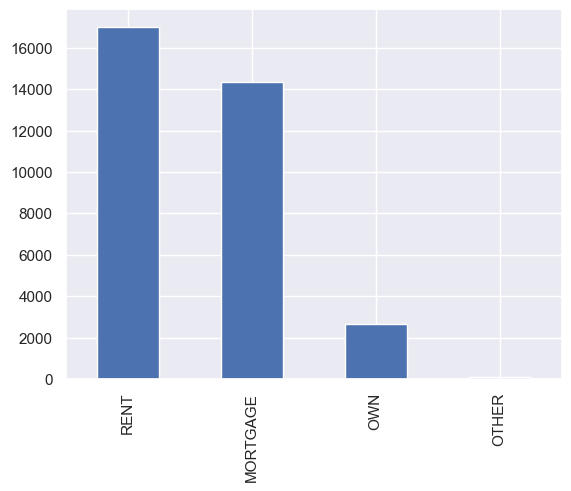

In [1750]:
loans['home_ownership'].value_counts().plot.bar()

### Purpose (some impact)

Most of the loans on the platform are for debt consolidation.

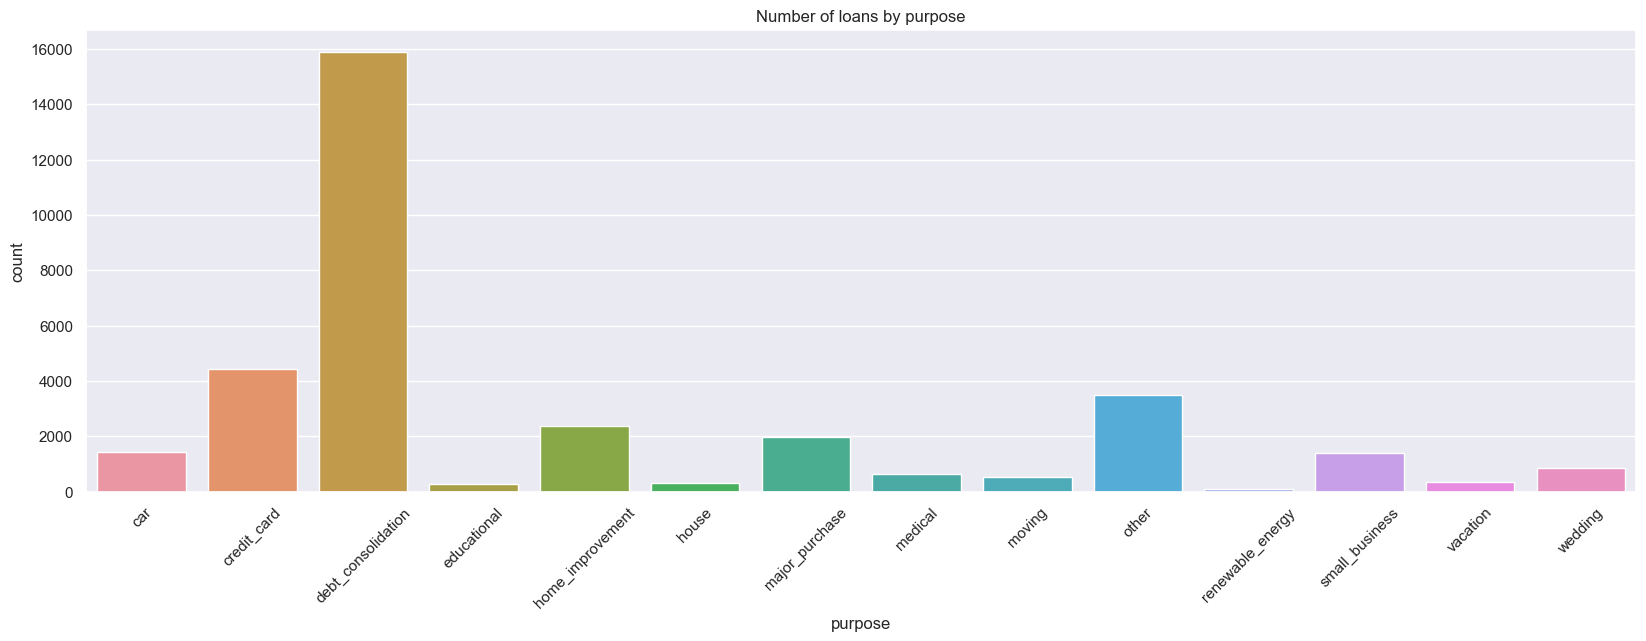

In [1751]:
# plot pie chart of number of loans by purpose
plt.figure(figsize=(20, 6))
sns.countplot(x='purpose', data=loans, order=sorted(loans['purpose'].unique()))
plt.title('Number of loans by purpose')
plt.xticks(rotation=45)
plt.show()

### State (addr_state) (some impact)

Lending club is heavily used in California, New York, Texas and Florida.

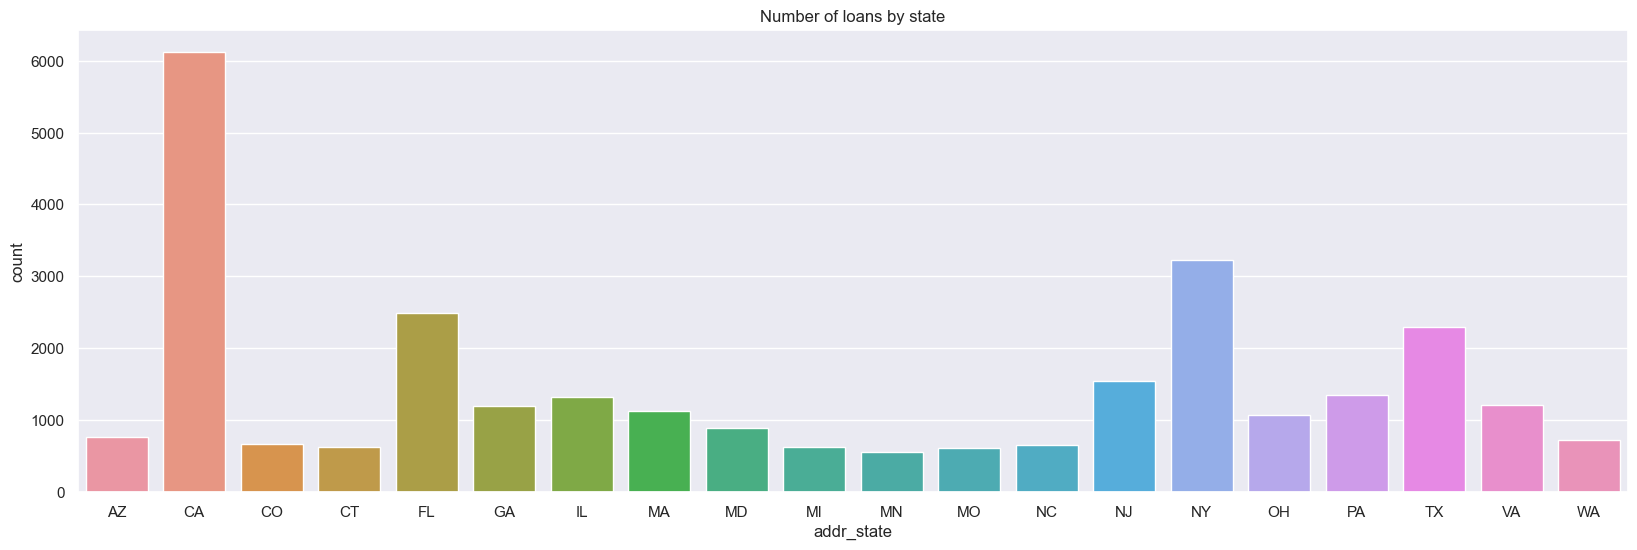

In [1752]:
# plot number of loans by state
plt.figure(figsize=(20, 6))

loans_per_State = loans[['addr_state', 'default']].copy()

# ignore states with less than 100 loans
loans_per_State = loans_per_State.groupby(['addr_state']).filter(lambda x: len(x) > 500)

sns.countplot(x='addr_state', data=loans_per_State, order=sorted(loans_per_State['addr_state'].unique()))
plt.title('Number of loans by state')
plt.show()

# Ordered Categorical Variable

### Grade

Majority of the lending club falls under Grade-B

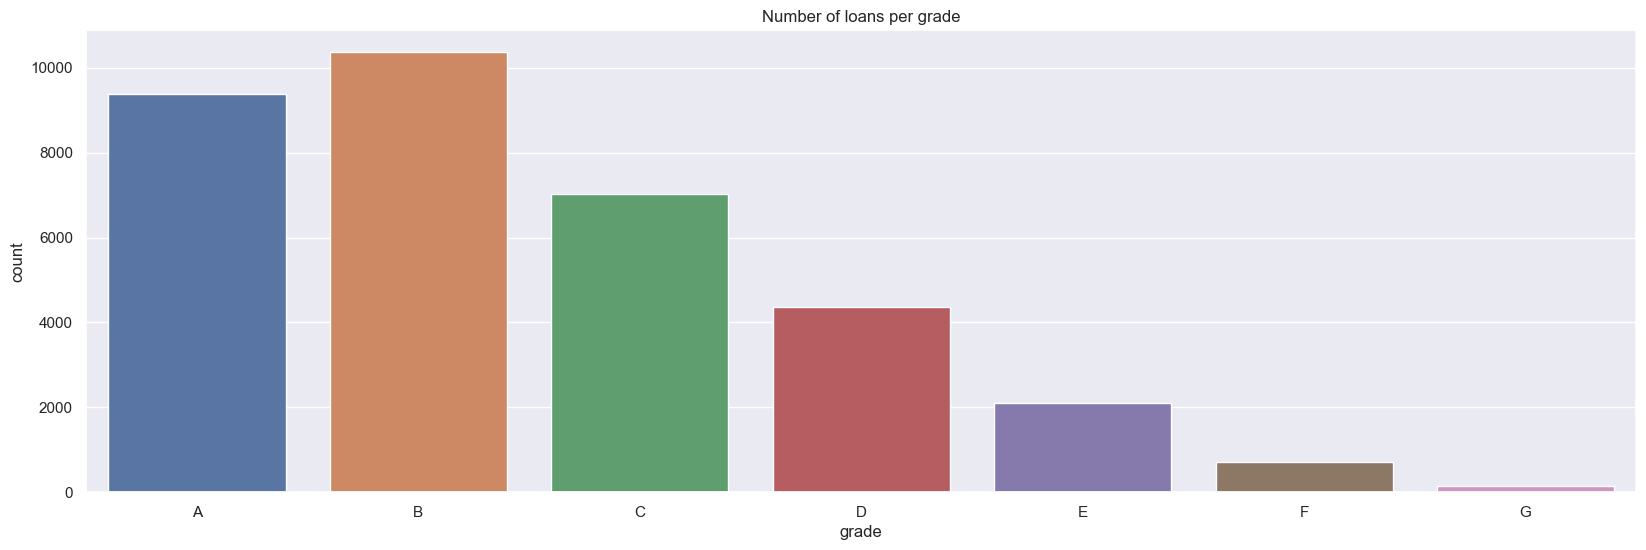

In [1753]:
# plot number of loans per grade
plt.figure(figsize=(20, 6))
sns.countplot(x='grade', data=loans, order=sorted(loans['grade'].unique()))
plt.title('Number of loans per grade')
plt.show()

### Employement Length
Majority of the employment length of the customers are of 10+ years.

<Axes: >

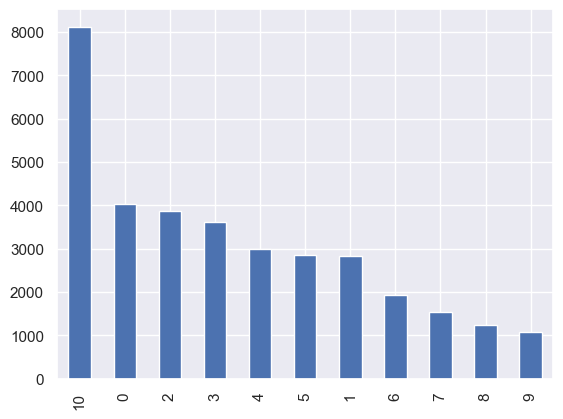

In [1754]:
loans['emp_length'].value_counts().plot.bar()

### Term size
Majority of the loan applications has taken the 36 month term plan.

<Axes: >

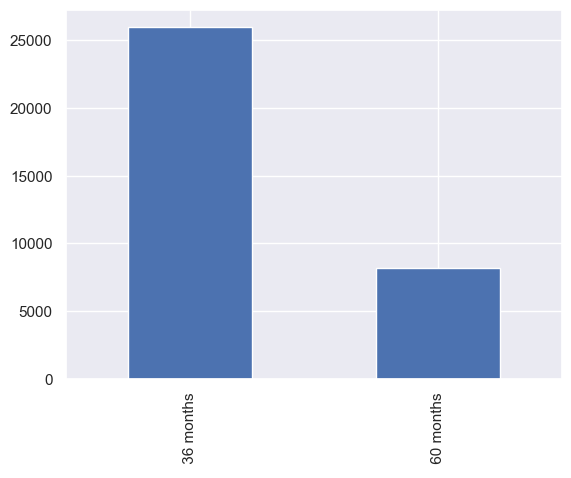

In [1755]:
loans['term'].value_counts().plot.bar()

# Segmented Univariate Analysis

### Grade and subgrade (not relevant)

Grade is assigned by lending club based on the credit score of the borrower. The subgrade is a more granular classification of the grade. The default rate is higher for lower grades and subgrades.
So interest rate is higher for lower grades and subgrades.

Lending club is giving more loans to better grades.

Analysis on grades and subgrades is not a relevant driving factor as it is assigned by lending club itself based on the credit score of the borrower.

Lending club is giving more loans to better grades. and default rates are increasing with lower grades, which means lending club is doing a good job in assigning grades.

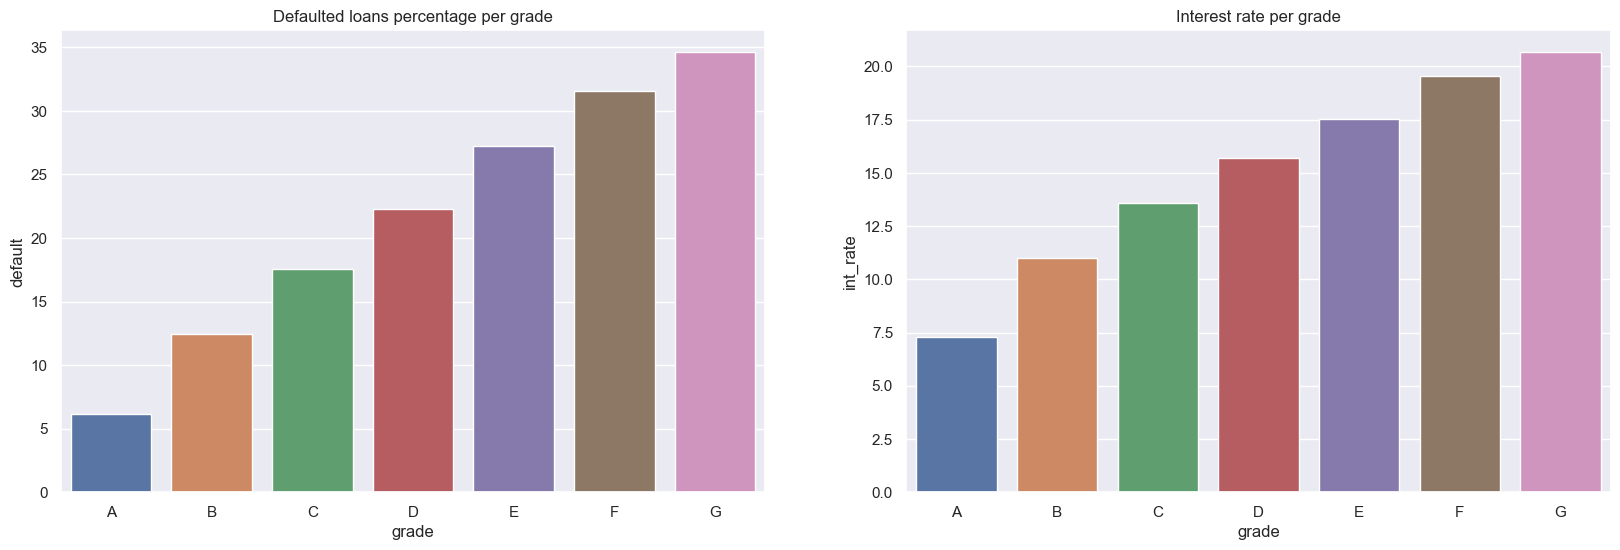

In [1756]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# draw line chart of defaulted loans percentage per grade
default_rate = loans.groupby(['grade']).agg({'default': 'mean'}).reset_index()
sns.barplot(x='grade', y='default', data=default_rate, ax=ax1)
ax1.set_title('Defaulted loans percentage per grade')

# draw interest rate per grade
interest_rate = loans.groupby(['grade']).agg({'int_rate': 'mean'}).reset_index()
sns.barplot(x='grade', y='int_rate', data=interest_rate, ax=ax2)
ax2.set_title('Interest rate per grade')

plt.show()

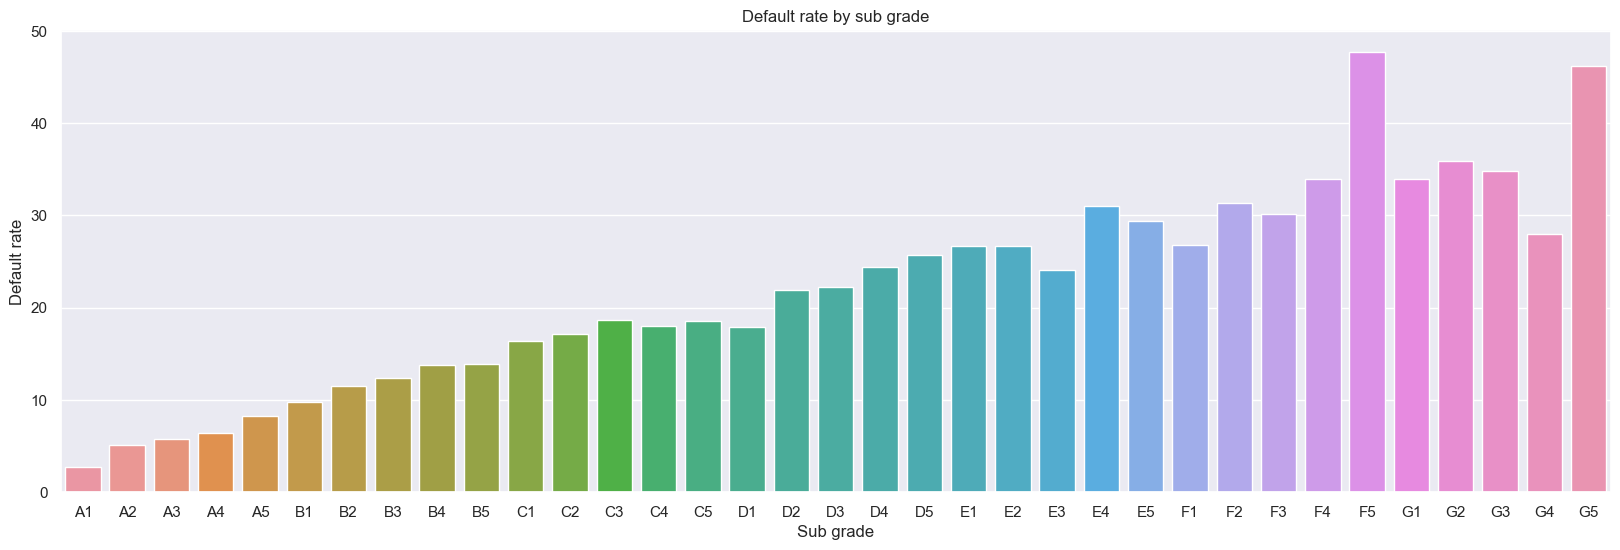

In [1757]:
# plot default rate by sub grade
plt.figure(figsize=(20, 6))
default_rate_sub_grade = loans[['sub_grade', 'default']].copy()
default_rate_sub_grade = default_rate_sub_grade.groupby(['sub_grade']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='sub_grade', y='default', data=default_rate_sub_grade)
plt.title('Default rate by sub grade')
plt.xlabel('Sub grade')
plt.ylabel('Default rate')
plt.show()

### Term size (huge impact)

There are 2 term sizes 36 and 60 months. The default rate is higher for 60 months term size by 2 times, this also reflects in the interest rate.

Although the number of loans given for 60 months term size is less than a quarter of the total loans, the default loans count is 40% of the total default loans.
While the 60 month term loans constitute 30% of the total funds, the loss brought in by these loans is almost 60% of the total loss.

This could be due to the fact that the borrower is more likely to default if the loan is longer, as the borrower is more likely to have a change in financial situation.

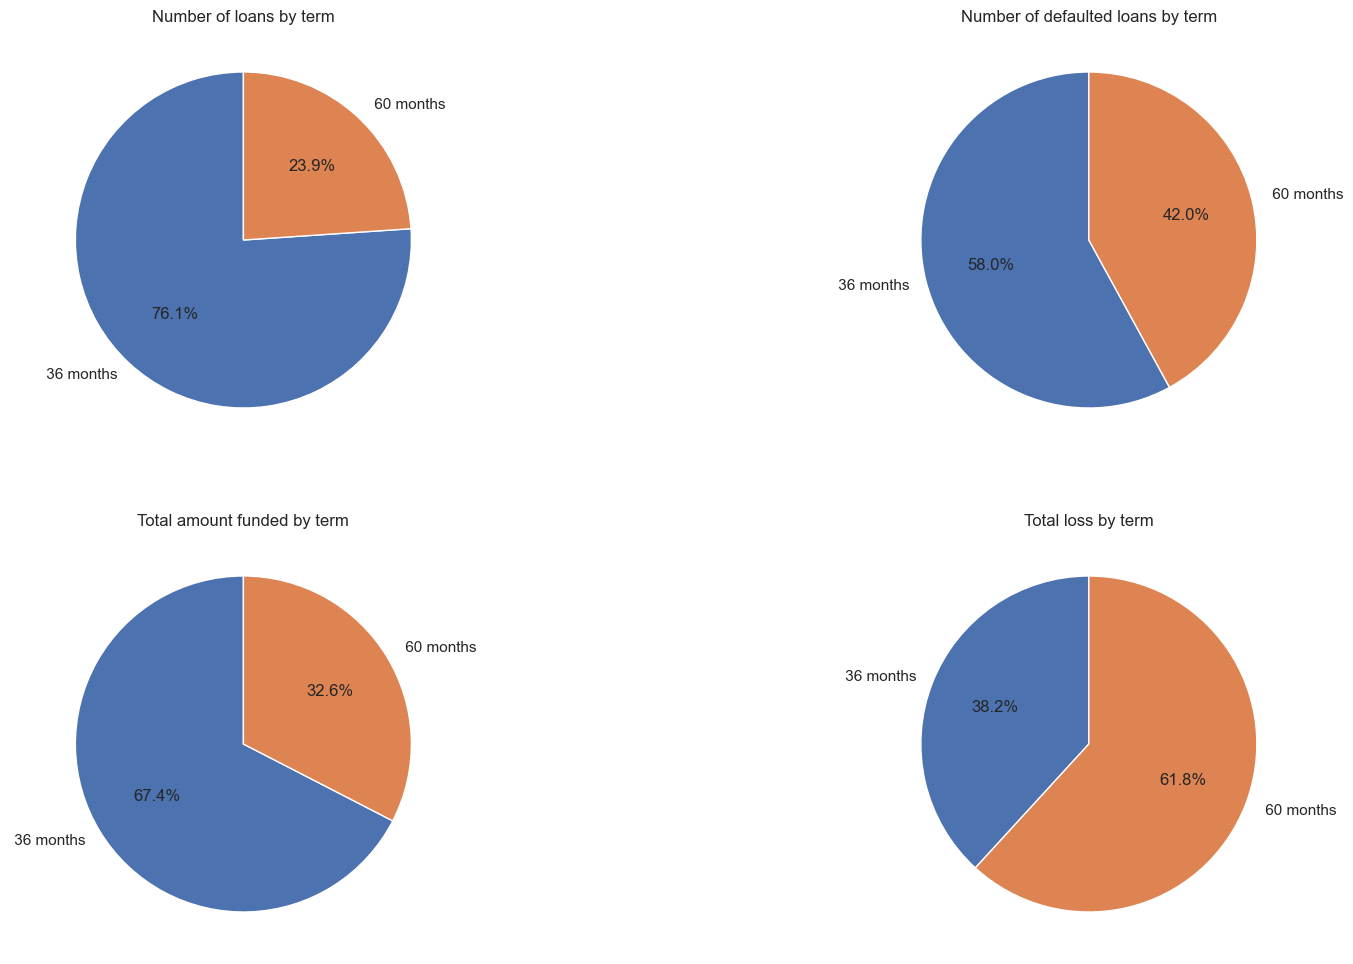

In [1758]:
fig, plots = plt.subplots(2, 2, figsize=(20, 12))

# draw pie chart of number of loans by term
term = loans.groupby(['term']).agg({'id': 'count'}).reset_index()
plots[0, 0].pie(term['id'], labels=term['term'], autopct='%1.1f%%', startangle=90)
plots[0, 0].set_title('Number of loans by term')

# draw pie chart of number of defaulted loans by term
defaulted_loans = loans[loans['default'] != 0]
defaulted_loans = defaulted_loans.groupby(['term']).agg({'id': 'count'}).reset_index()
plots[0, 1].pie(defaulted_loans['id'], labels=defaulted_loans['term'], autopct='%1.1f%%', startangle=90)
plots[0, 1].set_title('Number of defaulted loans by term')

# total amount funded by term
total_amount_funded = loans.groupby(['term']).agg({'funded_amnt': 'sum'}).reset_index()
plots[1, 0].pie(total_amount_funded['funded_amnt'], labels=total_amount_funded['term'], autopct='%1.1f%%', startangle=90)
plots[1, 0].set_title('Total amount funded by term')

# total loss by term
total_loss = loans.groupby(['term']).agg({'total_loss': 'sum'}).reset_index()
total_loss['total_loss'] = total_loss['total_loss'].abs()
plots[1, 1].pie(total_loss['total_loss'], labels=total_loss['term'], autopct='%1.1f%%', startangle=90)
plots[1, 1].set_title('Total loss by term')

plt.show()

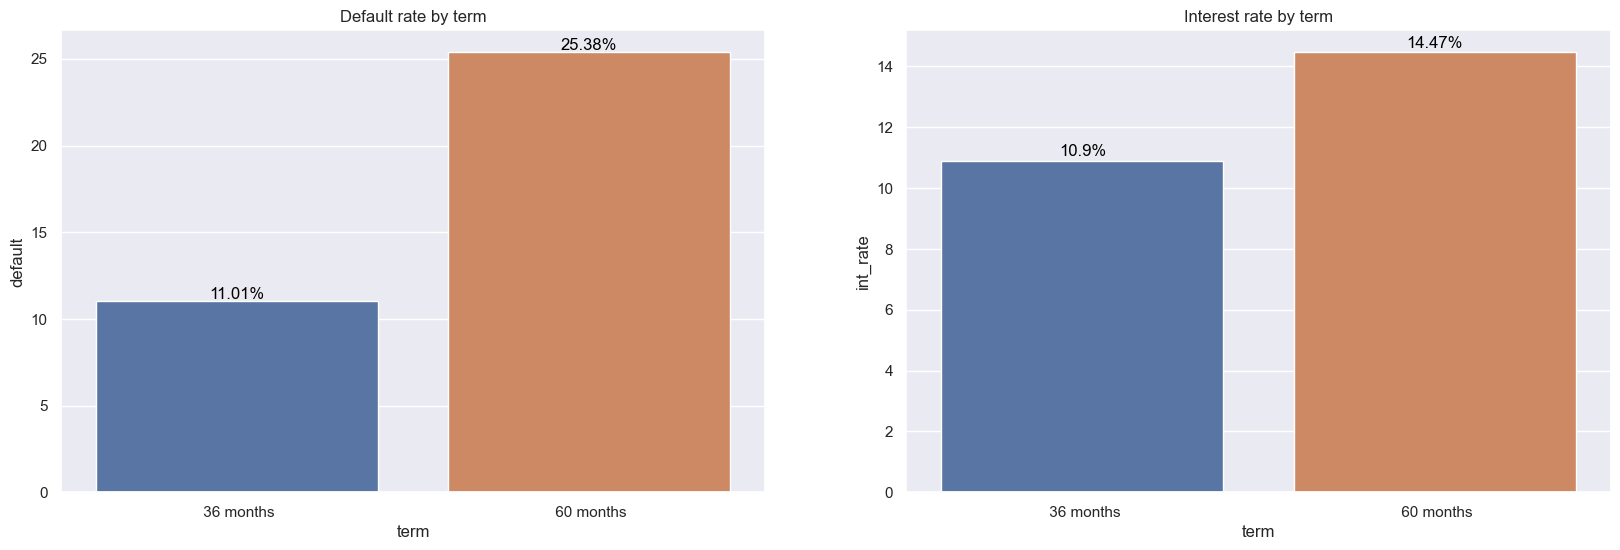

In [1759]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# plot default rate by term
default_rate = loans.groupby(['term']).agg({'default': 'mean'}).reset_index()
sns.barplot(x='term', y='default', data=default_rate, ax=ax1)

# show values on top of bars
for index, row in default_rate.iterrows():
    ax1.text(row.name, row.default + 0.15, str(round(row.default, 2)) + '%', color='black', ha="center")
ax1.set_title('Default rate by term')

# plot interest rate by term
interest_rate = loans.groupby(['term']).agg({'int_rate': 'mean'}).reset_index()
sns.barplot(x='term', y='int_rate', data=interest_rate, ax=ax2)

# show values on top of bars
for index, row in interest_rate.iterrows():
    ax2.text(row.name, row.int_rate + 0.15, str(round(row.int_rate, 2)) + '%', color='black', ha="center")
ax2.set_title('Interest rate by term')

plt.show()

### Purpose (some impact)

Small businesses, renewable energy and education have the highest default rate (15% - 20%)
Car, credit card, major puchase and wedding have the lowest default rate (about 10%)

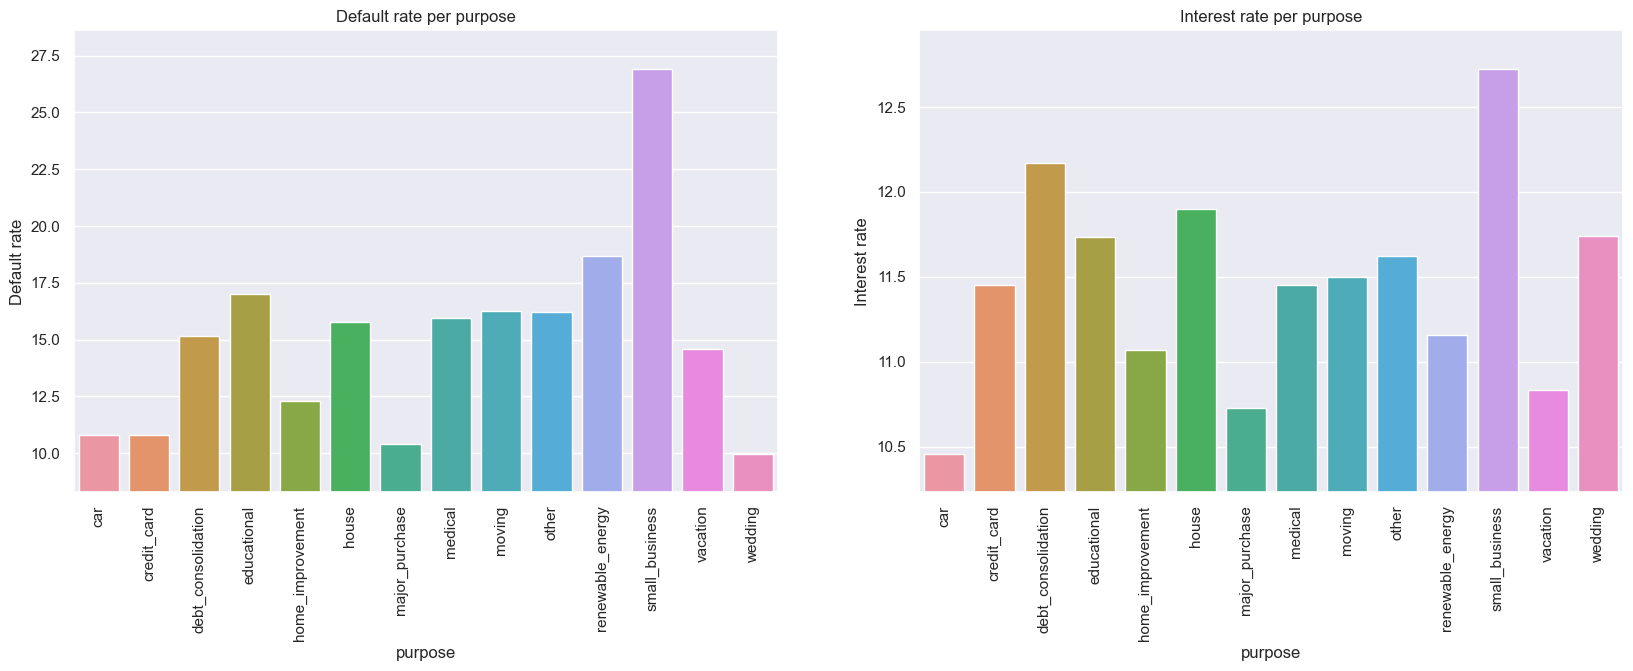

In [1760]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# draw loan default percentage per purpose
default_rate = loans.groupby(['purpose']).agg({'default': 'mean'}).reset_index()
sns.barplot(x='purpose', y='default', data=default_rate, ax=ax1)

# Get the minimum and maximum values
min_val = default_rate['default'].min()
max_val = default_rate['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
ax1.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Default rate per purpose')
ax1.set_ylabel('Default rate')

# draw interest rate per purpose
interest_rate = loans.groupby(['purpose']).agg({'int_rate': 'mean'}).reset_index()
sns.barplot(x='purpose', y='int_rate', data=interest_rate, ax=ax2)

# Get the minimum and maximum values
min_val = interest_rate['int_rate'].min()
max_val = interest_rate['int_rate'].max()

# Set the limits of y-axis to be slightly beyond the min and max
ax2.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Interest rate per purpose')
ax2.set_ylabel('Interest rate')

plt.show()

### Home ownership (no impact)

RENT        16997
MORTGAGE    14347
OWN          2669
OTHER          89
Name: home_ownership, dtype: int64


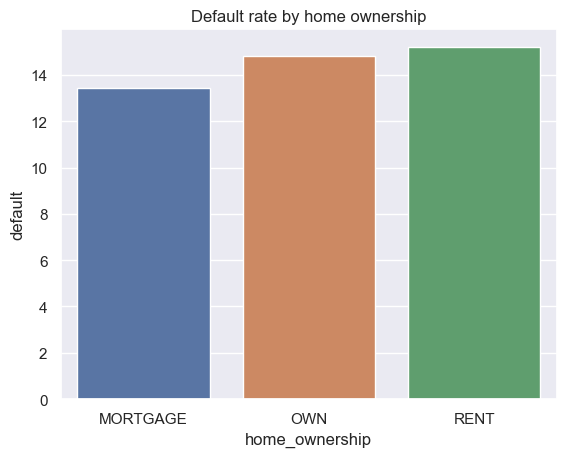

In [1761]:
print(loans['home_ownership'].value_counts())

# ignore NONE and OTHERS as they are very few
# loans = loans[loans['home_ownership'] != 'NONE']
loans = loans[loans['home_ownership'] != 'OTHER']

# plot default rate by home ownership
default_rate = loans.groupby(['home_ownership']).agg({'default': 'mean'}).reset_index()
sns.barplot(x='home_ownership', y='default', data=default_rate)
plt.title('Default rate by home ownership')
plt.show()

### Income of borrower (good impact)

Default rate is higher for lower income groups because they are more likely to default due to their financial situation.

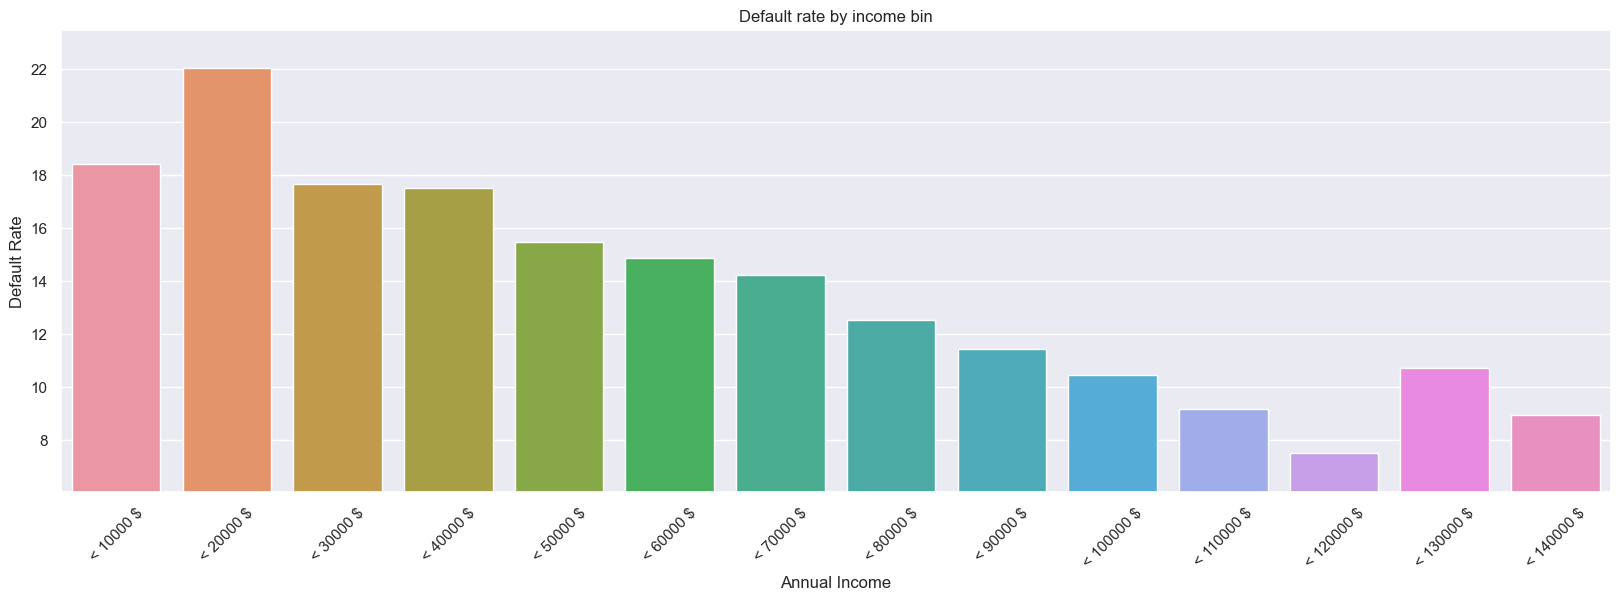

In [1762]:
plt.figure(figsize=(20, 6))

# Copy the DataFrame to avoid SettingWithCopyWarning
default_rate_income = loans[['loan_status', 'annual_inc', 'default']].copy()

# Define user-friendly bin edges
bin_edges = range(0, int(default_rate_income['annual_inc'].max() + 10000), 10000)
default_rate_income['income_bin'] = pd.cut(default_rate_income['annual_inc'], bins=bin_edges, include_lowest=True, right=False)

default_rate_income = default_rate_income.groupby(['income_bin']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='income_bin', y='default', data=default_rate_income)

# Get the minimum and maximum values from your data
min_val = default_rate_income['default'].min()
max_val = default_rate_income['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
bar_plot.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

bar_plot.set_xticklabels([f"< {str(interval.right)} $" for interval in default_rate_income['income_bin']], rotation=45)
plt.xlabel('Annual Income')
plt.ylabel('Default Rate')
plt.title('Default rate by income bin')
plt.show()

### Issue date (month and year) (probably should be derived metrics)

The number of loans issued has increased over the years. It has grown drastically almost doubling every year.

The default rate is slightly higher for loans issued in the 4th quarter of the year. This could be due to the holiday season and people spending more money during this time.

Having more commitments and making risky loans could be the reason for higher default rate.

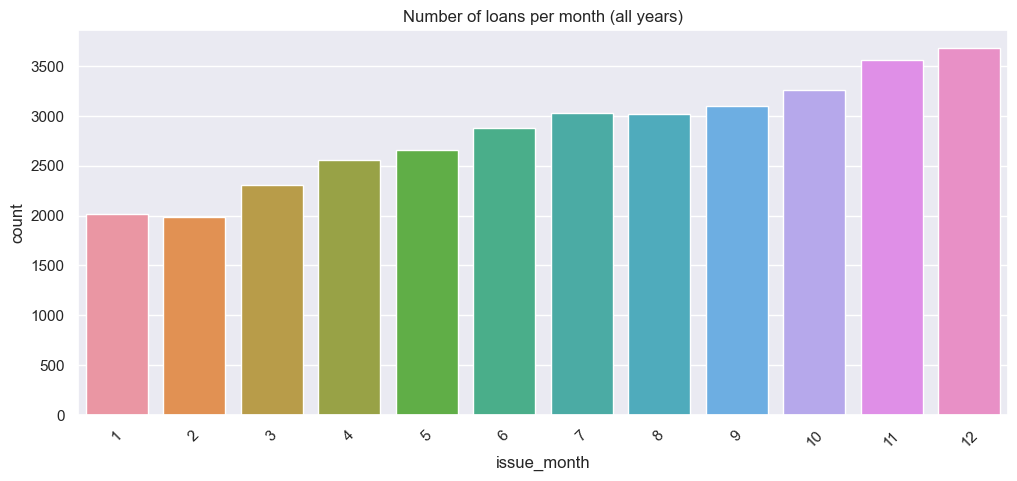

In [1763]:
# plot number of loans per month
plt.figure(figsize=(12, 5))

sns.countplot(x='issue_month', data=loans)
plt.xticks(rotation=45)
plt.title('Number of loans per month (all years)')
plt.show()

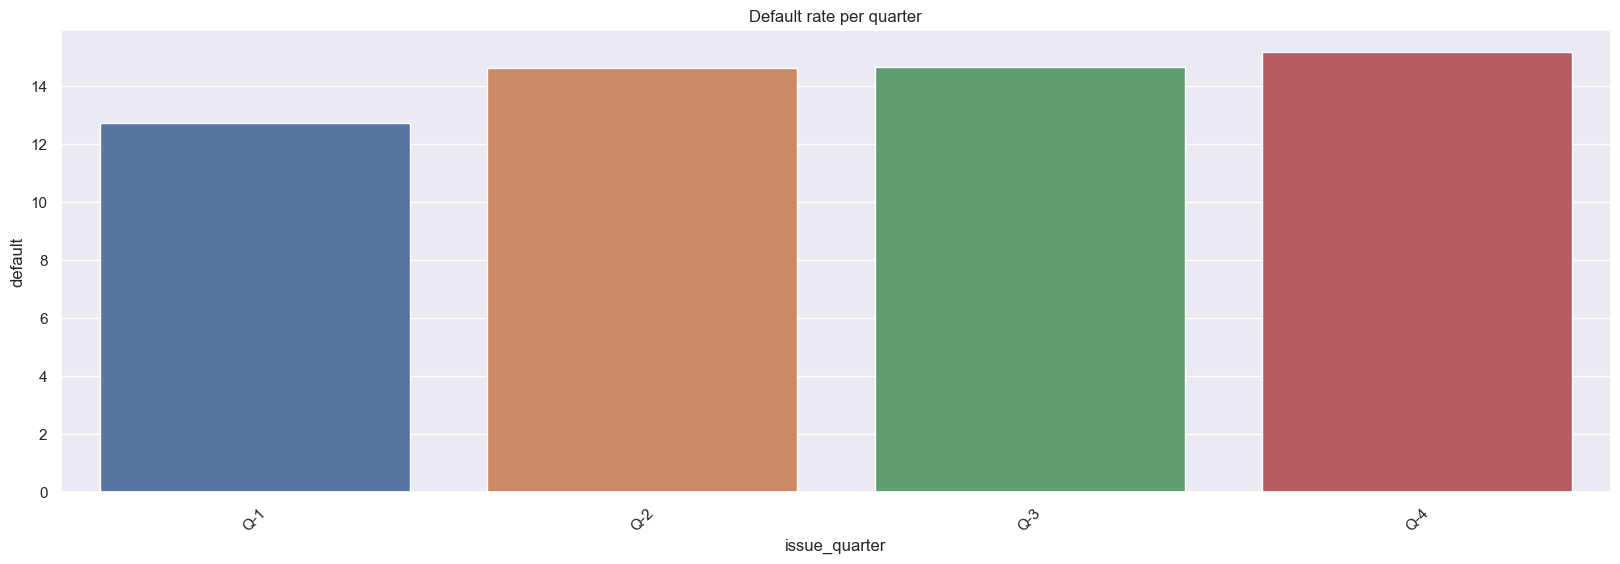

In [1764]:
# draw line chart of defaulted loans percentage per quarter
plt.figure(figsize=(20, 6))
df = loans.groupby(['issue_quarter']).agg({'default': 'mean'}).reset_index()
sns.barplot(x='issue_quarter', y='default', data=df)
plt.xticks(rotation=45)
plt.title('Default rate per quarter')
plt.show()

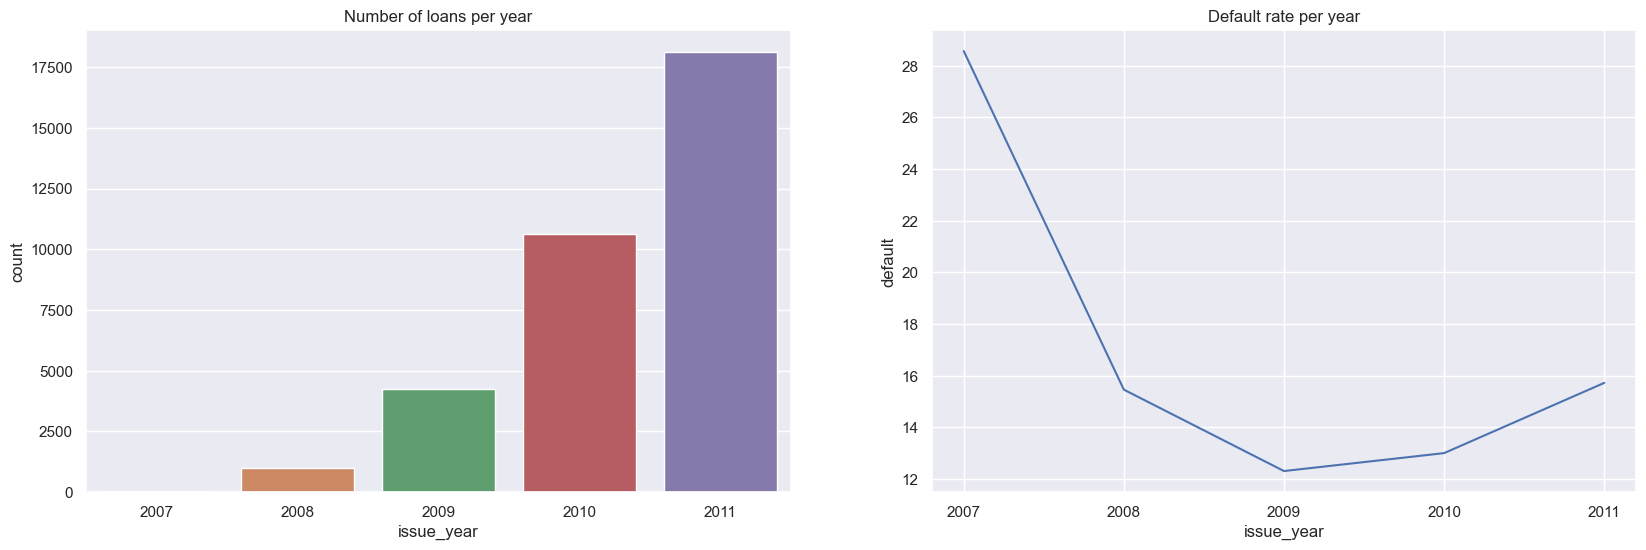

<Figure size 1200x600 with 0 Axes>

In [1765]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
# number of loans per year
sns.countplot(x='issue_year', data=loans, ax=ax1)
ax1.set_title('Number of loans per year')


# draw line chart of defaulted loans percentage per year
plt.figure(figsize=(12, 6))
df = loans.groupby(['issue_year']).agg({'default': 'mean'}).reset_index()
sns.lineplot(x='issue_year', y='default', data=df, ax=ax2)
ax2.set_xticks(df['issue_year'])
ax2.set_title('Default rate per year')

plt.show()

# Derived Variables

# Bivariate Analysis
Finding relation of default rate with different variables

### State with default issue (some impact)

Florida has the highest default rate (more than 17.5%) while Texas has the lowest default rate (less than 12%)

But the interest rate is not higher for states with higher default rate.

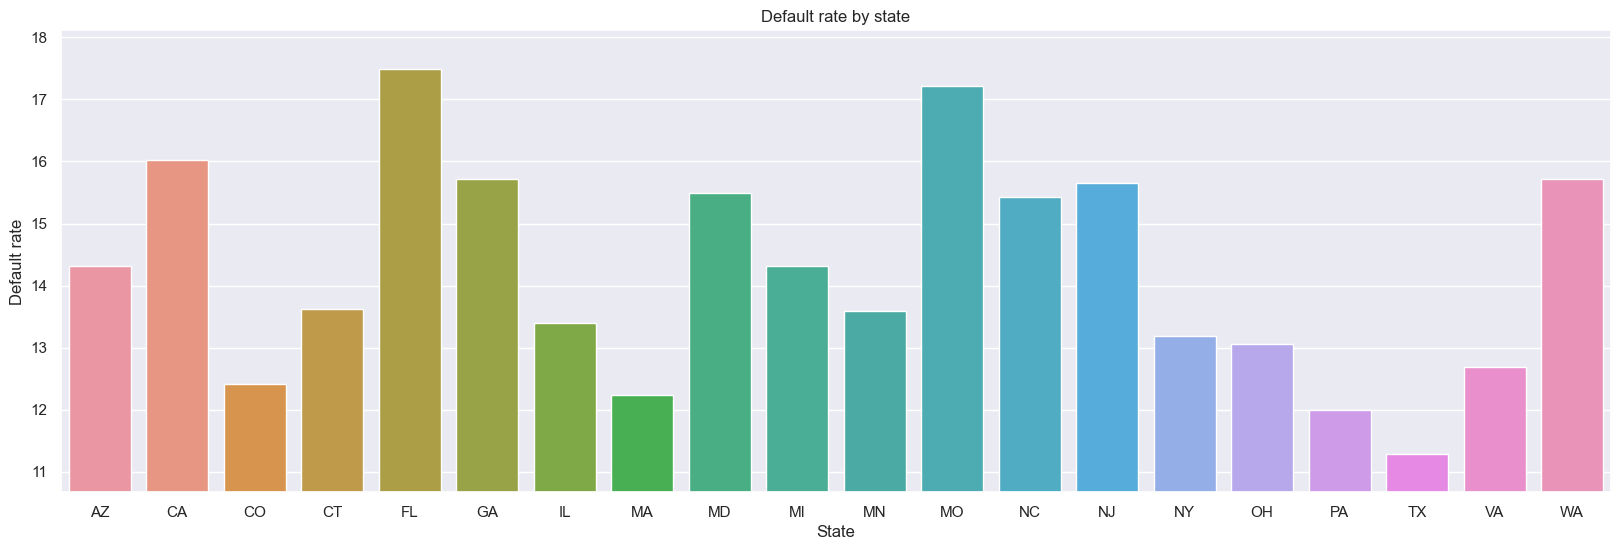

In [1767]:
# show the default rate in each state
plt.figure(figsize=(20, 6))

loans_per_State = loans_per_State.groupby(['addr_state']).agg({'default': 'mean'}).reset_index()

ax = sns.barplot(x='addr_state', y='default', data=loans_per_State)

# Get the minimum and maximum values from your data
min_val = loans_per_State['default'].min()
max_val = loans_per_State['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
ax.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

plt.title('Default rate by state')
plt.xlabel('State')
plt.ylabel('Default rate')
plt.show()

In [1768]:
fig = px.choropleth(
    loans_per_State, 
    locations='addr_state', 
    color='default',
    locationmode='USA-states', 
    scope="usa",
    title='Defaulters rate by State',
    color_continuous_scale=px.colors.sequential.Reds,
    labels={'percentage': 'Percentage of Defaulters'},
)
fig.update_layout(margin={"r": 0, "t": 50, "l": 0, "b": 10})
fig.show()

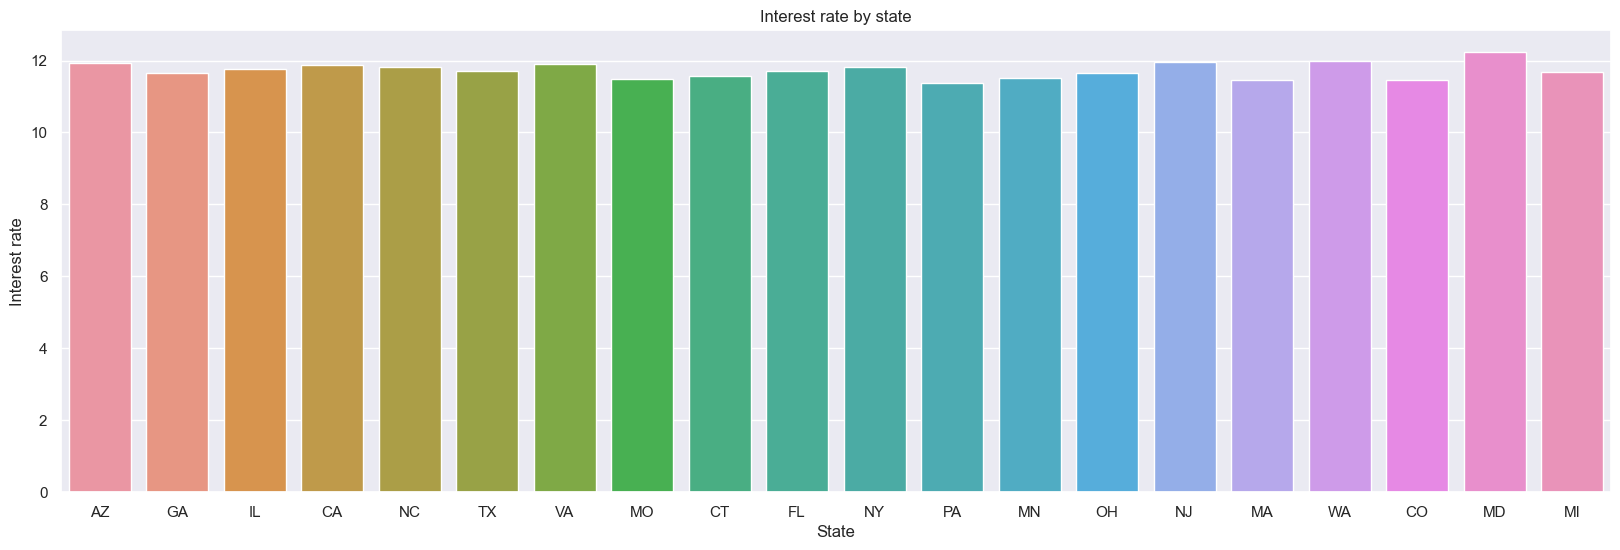

In [1769]:
# interest rate by state
plt.figure(figsize=(20, 6))

loans_per_State = loans[['addr_state', 'int_rate']].copy()

# ignore states with less than 500 loans
loans_per_State = loans_per_State.groupby(['addr_state']).filter(lambda x: len(x) > 500)

sns.barplot(x='addr_state', y='int_rate', data=loans_per_State, errorbar=None)

plt.title('Interest rate by state')
plt.xlabel('State')
plt.ylabel('Interest rate')
plt.show()

Check comments in the above & below-to-below cell and correct the values 

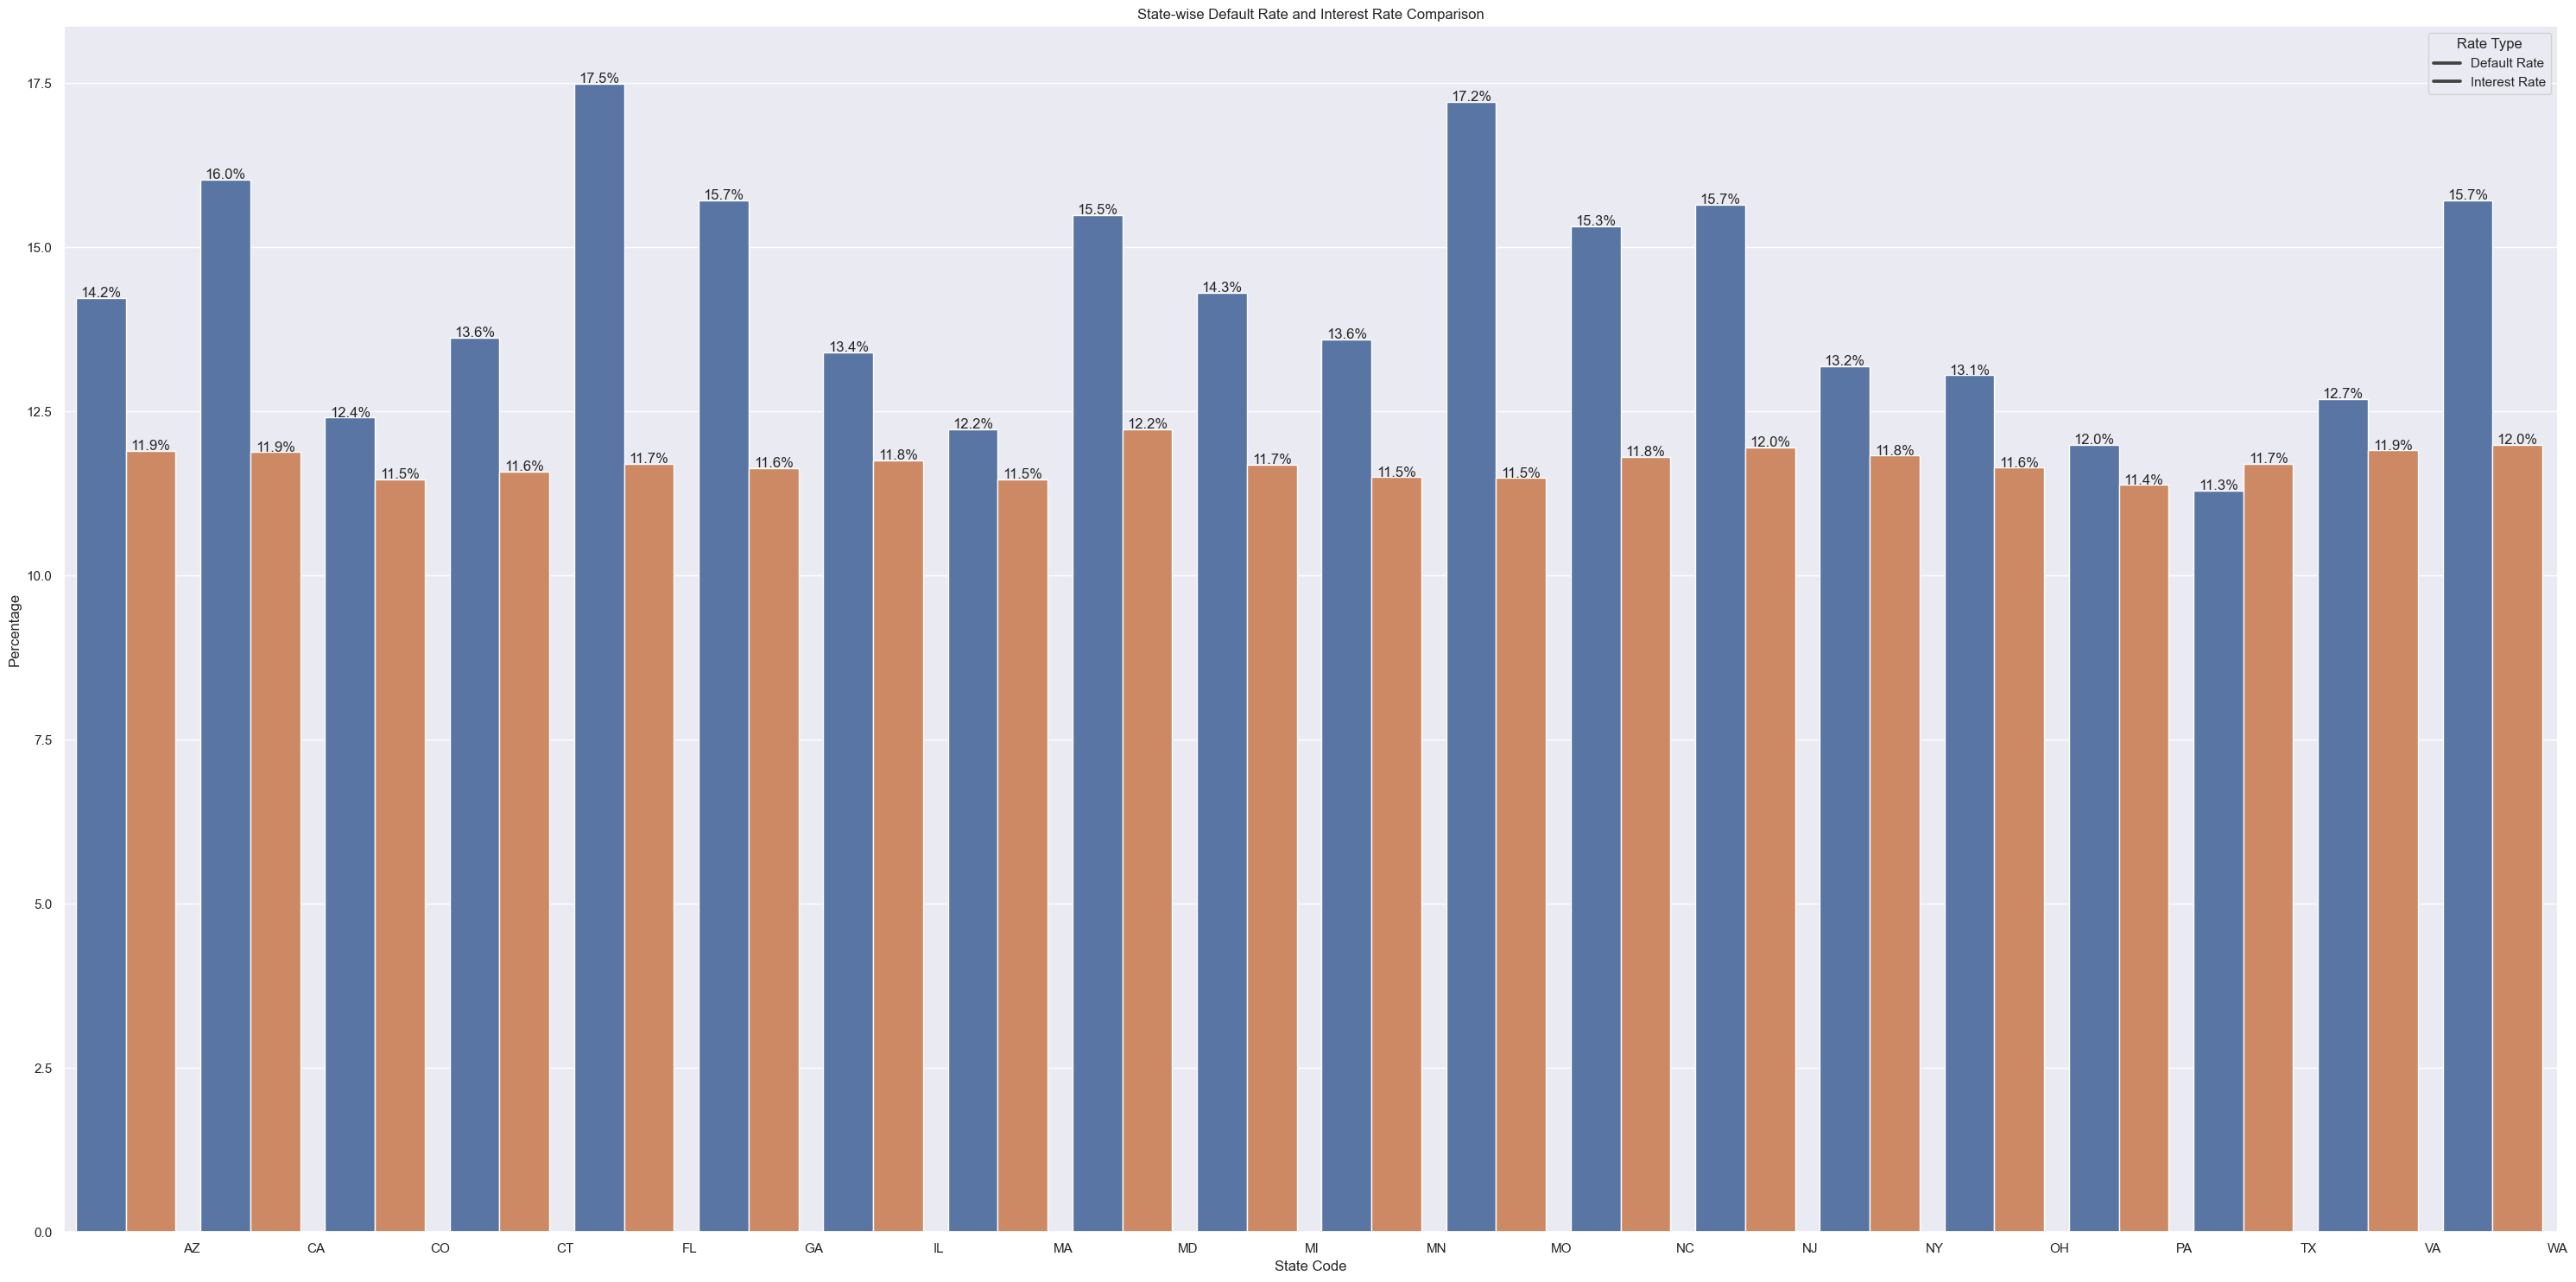

In [1785]:
plt.figure(figsize=(30, 15))

avg_int_rate_per_State = loans[['addr_state', 'int_rate']].copy()

# ignore states with less than 500 loans
avg_int_rate_per_State = avg_int_rate_per_State.groupby(['addr_state']).filter(lambda x: len(x) > 500)

avg_int_rate_per_State = avg_int_rate_per_State.groupby(by='addr_state').mean()


avg_default_rate_per_State = loans[['addr_state', 'default']].copy()

# ignore states with less than 100 loans
avg_default_rate_per_State = avg_default_rate_per_State.groupby(['addr_state']).filter(lambda x: len(x) > 500)

avg_default_rate_per_State = avg_default_rate_per_State.groupby(by='addr_state').mean()

avg_rate_data_per_State = avg_default_rate_per_State.merge(avg_int_rate_per_State, on='addr_state')

new_data = avg_rate_data_per_State.stack().reset_index()
new_data.columns = ['State Code', 'Rate Type', 'Percentage']
new_data

ax = sns.barplot(x='State Code', y='Percentage', hue='Rate Type', data=new_data)


# Add percentages on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.01,
            '{:.1%}'.format(height/100),
            ha="center")

# Set spacing between each double bar plot
bar_width = 0.35
total_bars = len(new_data['State Code'].unique())
ax.set_xticks([x + bar_width / 2 + bar_width for x in range(total_bars)])
ax.set_xticklabels(new_data['State Code'].unique())

plt.xlabel('State Code')
plt.ylabel('Percentage')
plt.title('State-wise Default Rate and Interest Rate Comparison')

plt.xticks(rotation=0)

plt.legend(title='Rate Type', loc='upper right', labels=['Default Rate', 'Interest Rate'])


plt.tight_layout()
plt.show()

### Public records (good impact)

Loans given to borrowers with public records have a much higher default rate.

0.0    32461
1.0     1547
2.0        5
Name: pub_rec_bankruptcies, dtype: int64


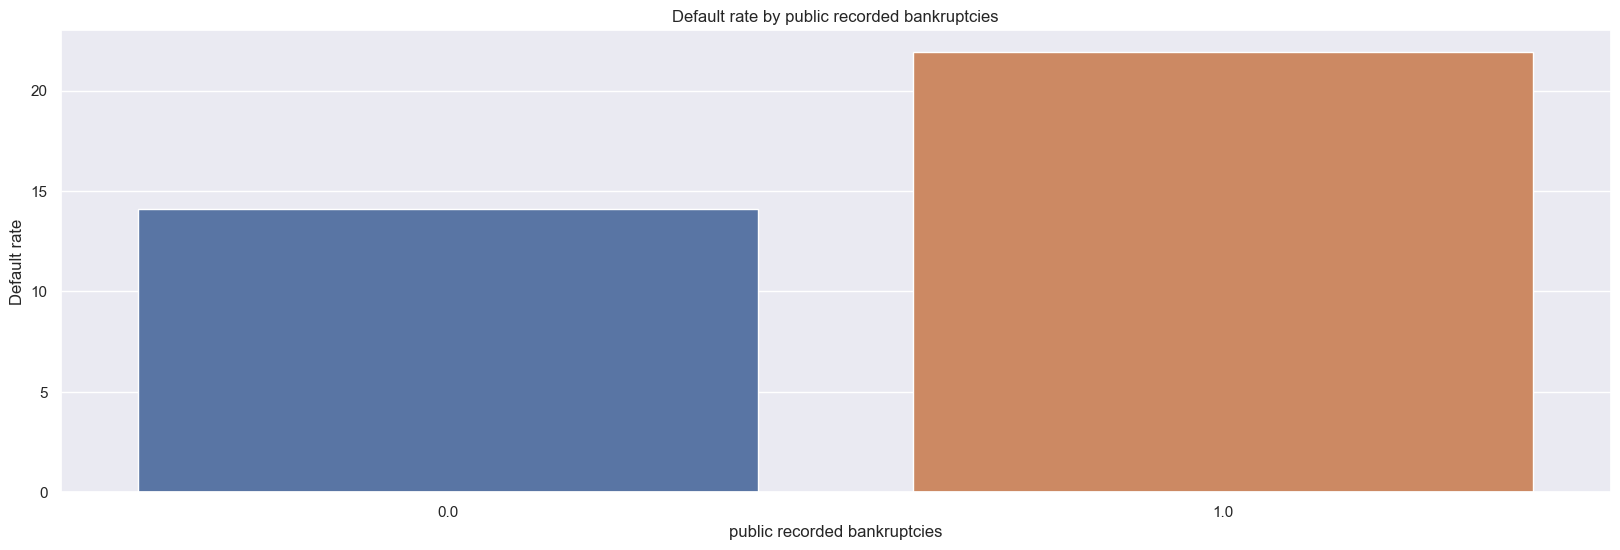

In [1771]:
print(loans['pub_rec_bankruptcies'].value_counts())

# ignore 2 public recorded bankruptcies as they are very few
loans = loans[loans['pub_rec_bankruptcies'] != 2]

# draw default by pub_rec_bankruptcies
plt.figure(figsize=(20, 6))
default_rate = loans.groupby(['pub_rec_bankruptcies']).agg({'default': 'mean'}).reset_index()
sns.barplot(x='pub_rec_bankruptcies', y='default', data=default_rate)
plt.title('Default rate by public recorded bankruptcies')
plt.xlabel('public recorded bankruptcies')
plt.ylabel('Default rate')
plt.show()


### Interest rate (not relevant)

Interest rates are abviously higher for higher risk loans. this is correlated and driven by grade and subgrade of the loan, and is not a relevant driving factor, as it is assigned by lending club itself based on the credit score of the borrower.

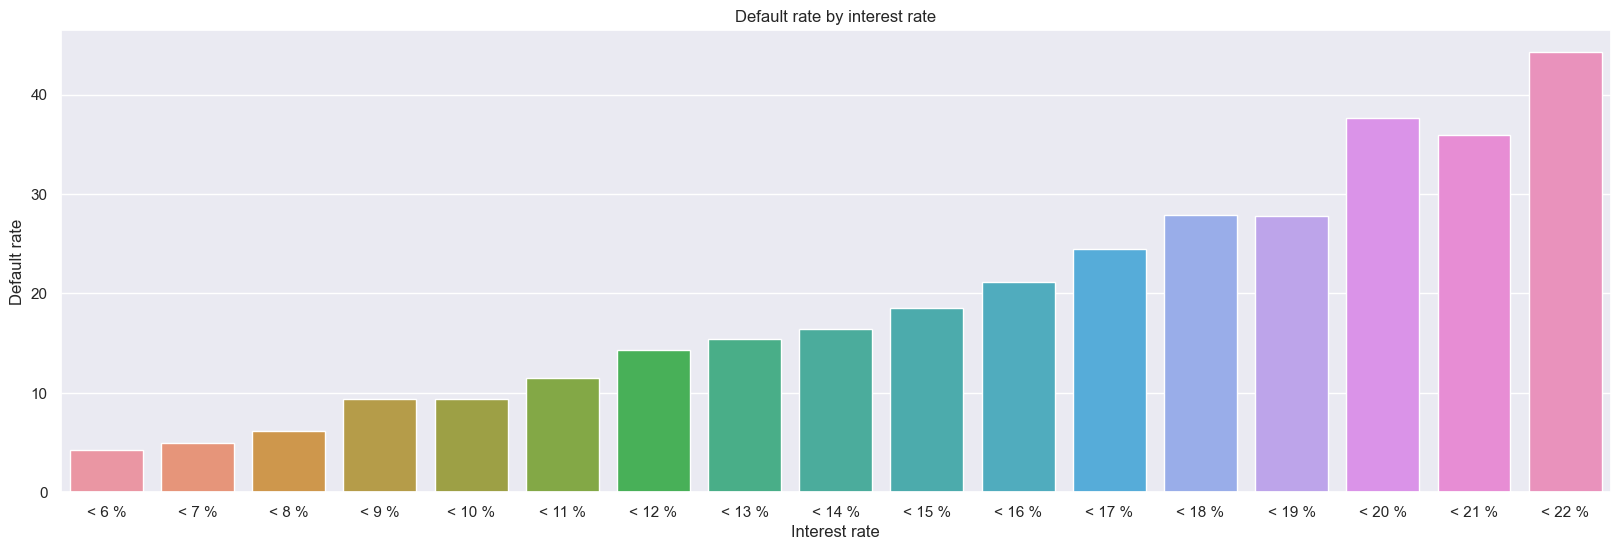

In [1772]:
# draw default by binned interest rate
plt.figure(figsize=(20, 6))
default_rate_interest = loans[['int_rate', 'default']].copy()
# bin interest rate using intervals of 1% on column 'int_rate'
bin_edges = range(int(default_rate_interest['int_rate'].min()), int(default_rate_interest['int_rate'].max() + 1), 1)
default_rate_interest['int_rate_bin'] = pd.cut(default_rate_interest['int_rate'], bins=bin_edges, include_lowest=True, right=False)
default_rate_interest = default_rate_interest.groupby(['int_rate_bin']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='int_rate_bin', y='default', data=default_rate_interest)
plt.title('Default rate by interest rate')
plt.xlabel('Interest rate')
bar_plot.set_xticklabels([f"< {str(interval.right)} %" for interval in default_rate_interest['int_rate_bin']])
plt.ylabel('Default rate')
plt.show()

### Loan amount (good impact)

Default rate is higher for higher loan amounts.

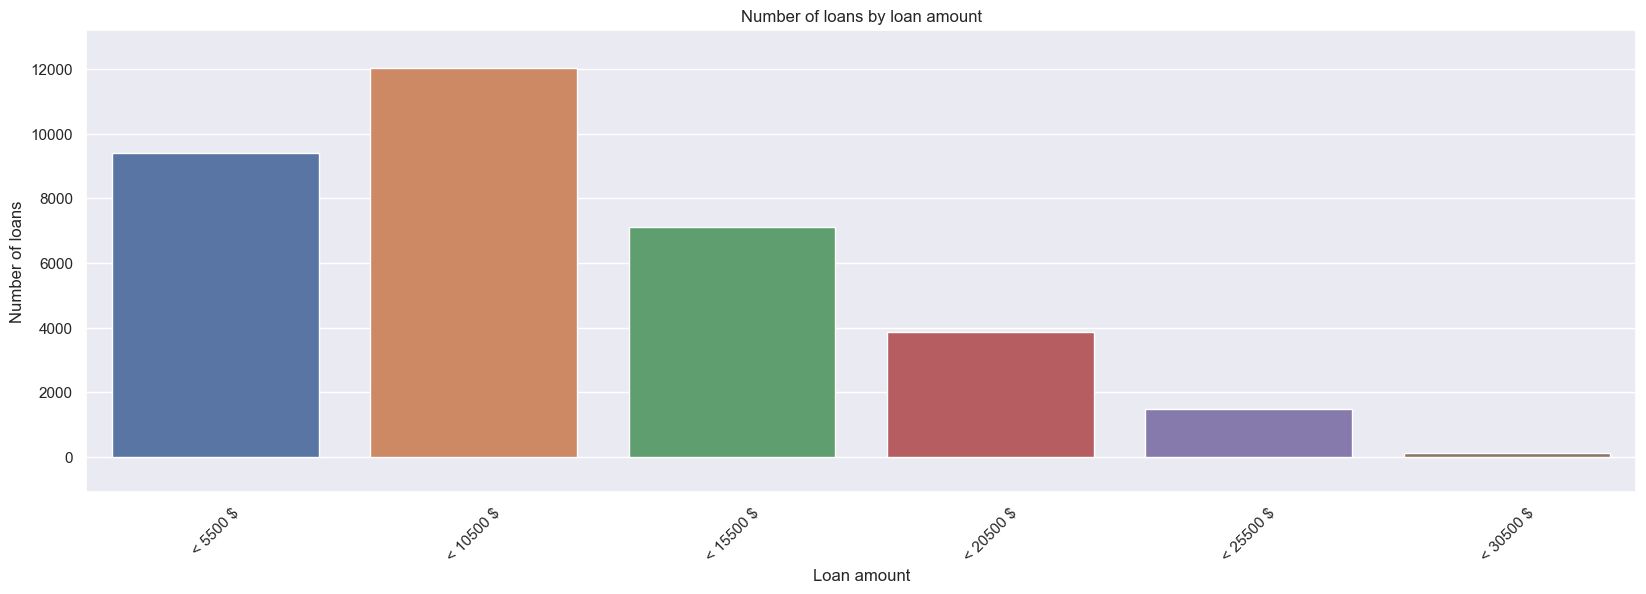

In [1773]:
# plot number of loans by binned loan amount
plt.figure(figsize=(20, 6))
default_rate_loan_amount = loans[['loan_amnt', 'default']].copy()
# bin loan amount using intervals of 2000 on column 'loan_amnt'
bin_size = 5000
bin_edges = range(int(default_rate_loan_amount['loan_amnt'].min()), int(default_rate_loan_amount['loan_amnt'].max() + bin_size), bin_size)
default_rate_loan_amount['loan_amnt_bin'] = pd.cut(default_rate_loan_amount['loan_amnt'], bins=bin_edges, include_lowest=True, right=False)
default_rate_loan_amount = default_rate_loan_amount.groupby(['loan_amnt_bin']).agg({'default': 'count'}).reset_index()

bar_plot = sns.barplot(x='loan_amnt_bin', y='default', data=default_rate_loan_amount)

# Get the minimum and maximum values from your data
min_val = default_rate_loan_amount['default'].min()
max_val = default_rate_loan_amount['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
bar_plot.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

plt.title('Number of loans by loan amount')
plt.xlabel('Loan amount')
bar_plot.set_xticklabels([f"< {str(interval.right)} $" for interval in default_rate_loan_amount['loan_amnt_bin']], rotation=45)
plt.ylabel('Number of loans')
plt.show()

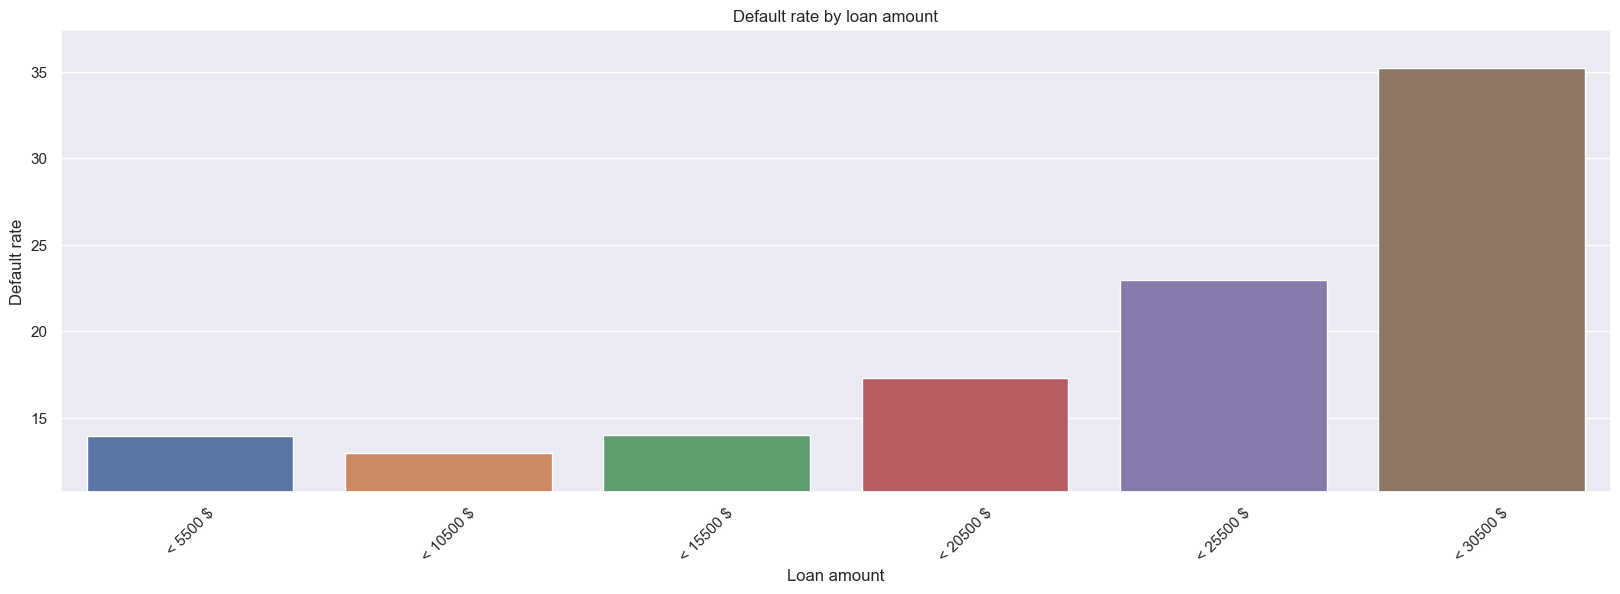

In [1774]:
# plot default rate by binned loan amount
plt.figure(figsize=(20, 6))
default_rate_loan_amount = loans[['loan_amnt', 'default']].copy()
# bin loan amount using intervals of 2000 on column 'loan_amnt'
bin_size = 5000
bin_edges = range(int(default_rate_loan_amount['loan_amnt'].min()), int(default_rate_loan_amount['loan_amnt'].max() + bin_size), bin_size)

default_rate_loan_amount['loan_amnt_bin'] = pd.cut(default_rate_loan_amount['loan_amnt'], bins=bin_edges, include_lowest=True, right=False)
default_rate_loan_amount = default_rate_loan_amount.groupby(['loan_amnt_bin']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='loan_amnt_bin', y='default', data=default_rate_loan_amount)

# Get the minimum and maximum values from your data
min_val = default_rate_loan_amount['default'].min()
max_val = default_rate_loan_amount['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
bar_plot.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

plt.title('Default rate by loan amount')
plt.xlabel('Loan amount')
bar_plot.set_xticklabels([f"< {str(interval.right)} $" for interval in default_rate_loan_amount['loan_amnt_bin']], rotation=45)
plt.ylabel('Default rate')
plt.show()

### Debt to income ratio (good impact)

Default rate is higher for higher debt to income ratio. debt to income ratio is the ratio of the borrower's total monthly debt payments to the borrower's monthly income.

Higher the Debt to income ratio indicates the borrower is handling more debt than he can afford to pay.

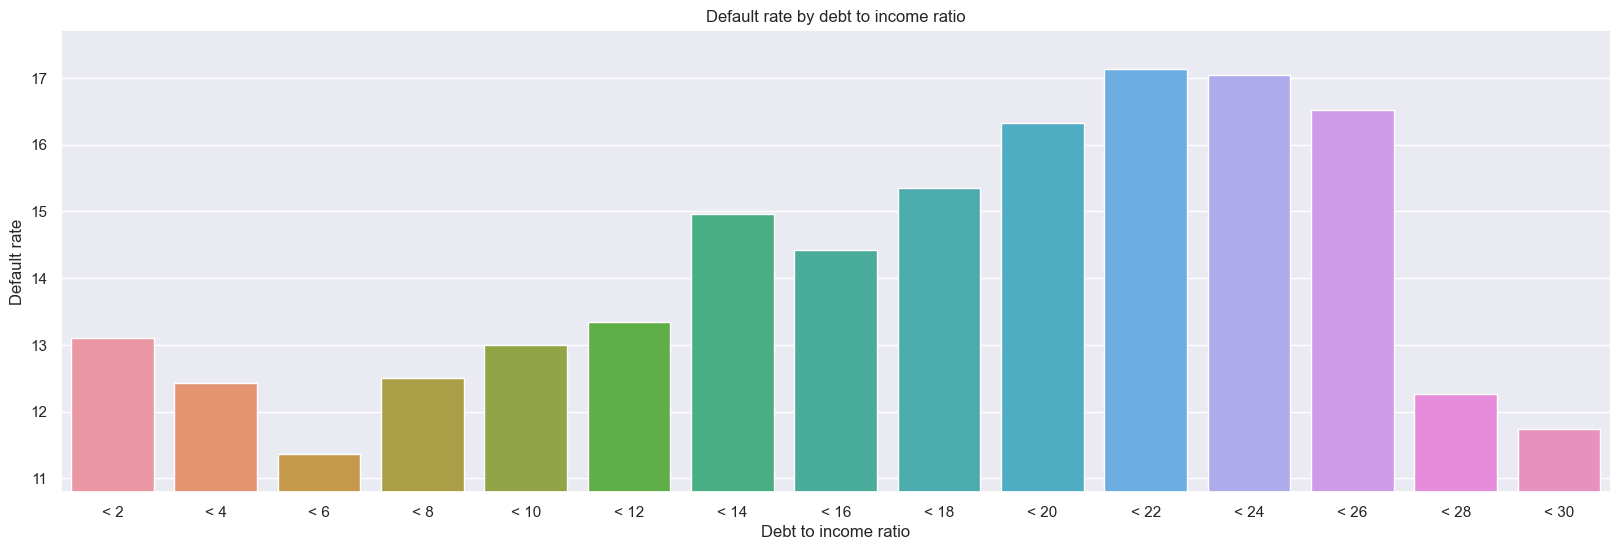

In [1775]:
# plot default rate by dti
plt.figure(figsize=(20, 6))
default_rate_dti = loans[['dti', 'default']].copy()

# bin dti using intervals of 5 on column 'dti'
bin_edges = range(int(default_rate_dti['dti'].min()), int(default_rate_dti['dti'].max() + 2), 2)
default_rate_dti['dti_bin'] = pd.cut(default_rate_dti['dti'], bins=bin_edges, include_lowest=True, right=False)
default_rate_dti = default_rate_dti.groupby(['dti_bin']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='dti_bin', y='default', data=default_rate_dti)

# Get the minimum and maximum values from your data
min_val = default_rate_dti['default'].min()
max_val = default_rate_dti['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
bar_plot.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

plt.title('Default rate by debt to income ratio')
plt.xlabel('Debt to income ratio')
bar_plot.set_xticklabels([f"< {str(interval.right)}" for interval in default_rate_dti['dti_bin']])
plt.ylabel('Default rate')
plt.show()

### Employment length of the borrower (no impact)

Employment length has no impact on default rate.

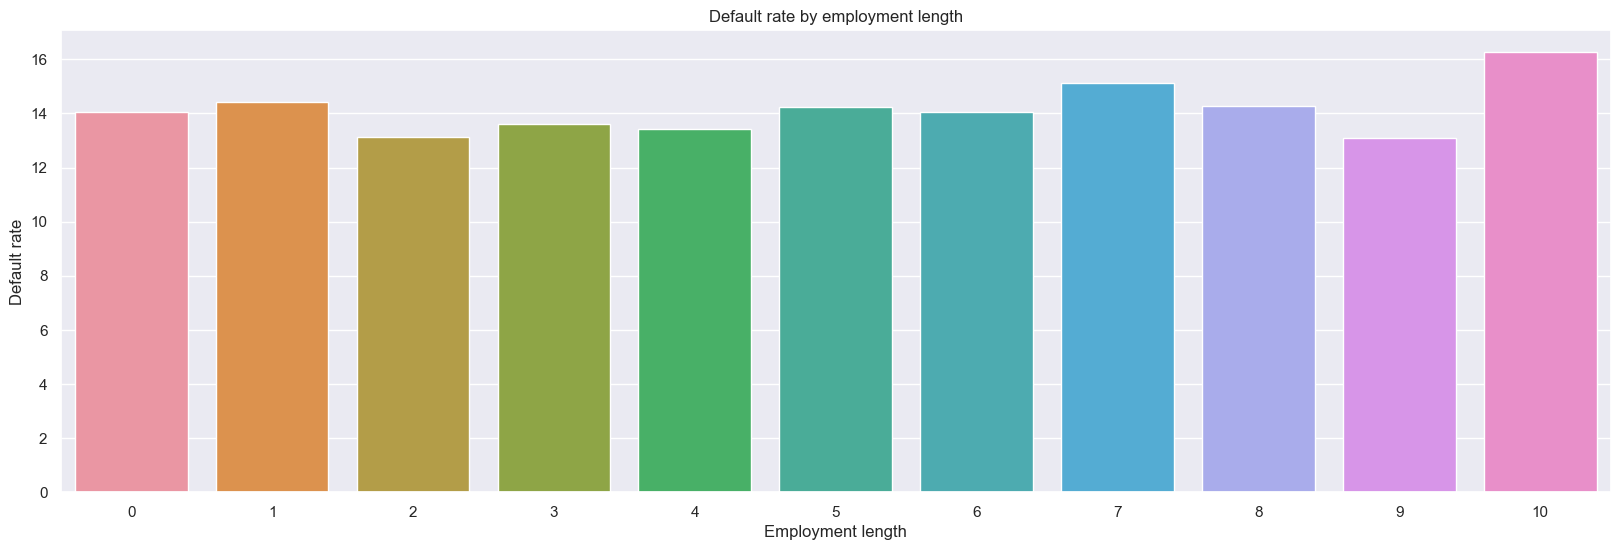

In [1776]:
# plot default rate by emp_length
plt.figure(figsize=(20, 6))
default_rate_emp_length = loans[['emp_length', 'default']].copy()
default_rate_emp_length = default_rate_emp_length.groupby(['emp_length']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='emp_length', y='default', data=default_rate_emp_length)
plt.title('Default rate by employment length')
plt.xlabel('Employment length')
plt.ylabel('Default rate')
plt.show()

### Verification status of borrower (no impact)

Verification status of the lendee does not seem to have any impact on the default rate.

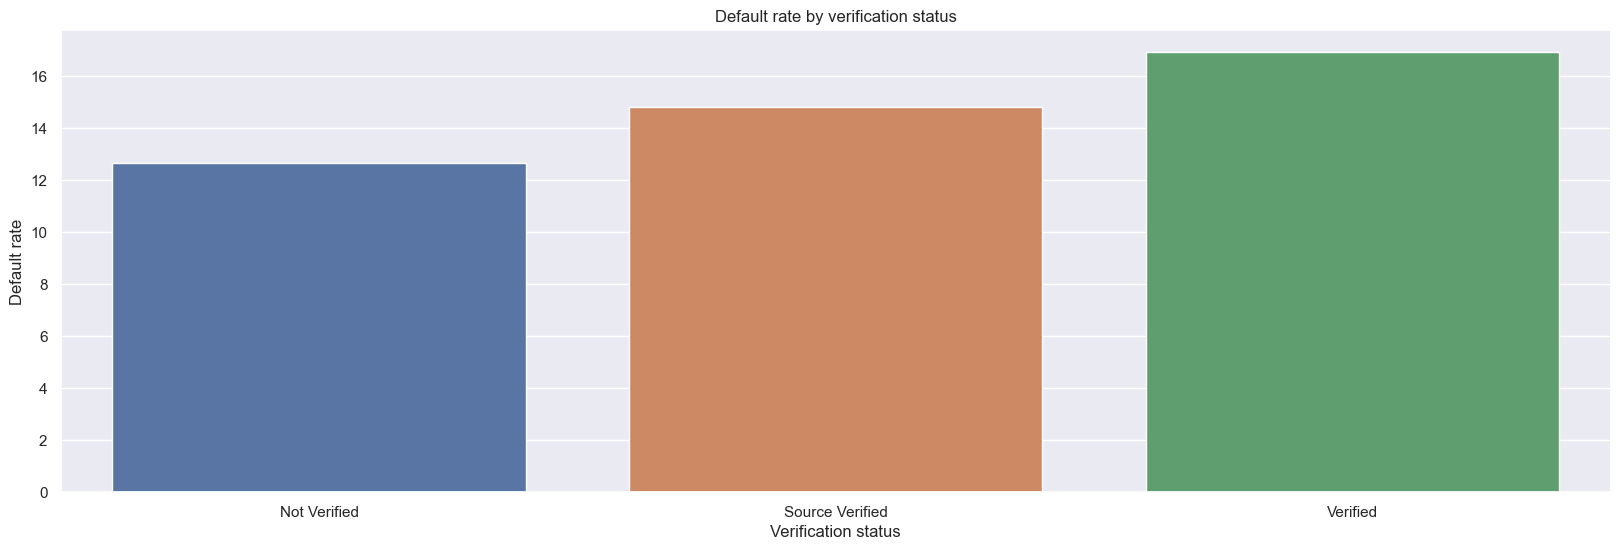

In [1777]:
# plot default rate by verification_status
plt.figure(figsize=(20, 6))
default_rate_verification_status = loans[['verification_status', 'default']].copy()
default_rate_verification_status = default_rate_verification_status.groupby(['verification_status']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='verification_status', y='default', data=default_rate_verification_status)
plt.title('Default rate by verification status')
plt.xlabel('Verification status')
plt.ylabel('Default rate')
plt.show()

### Previously closed credit lines (good impact)

Default rate reduces with increase in closed credit lines, meaning that people with more closed credit lines are more likely to pay back the loan due to their richer credit history

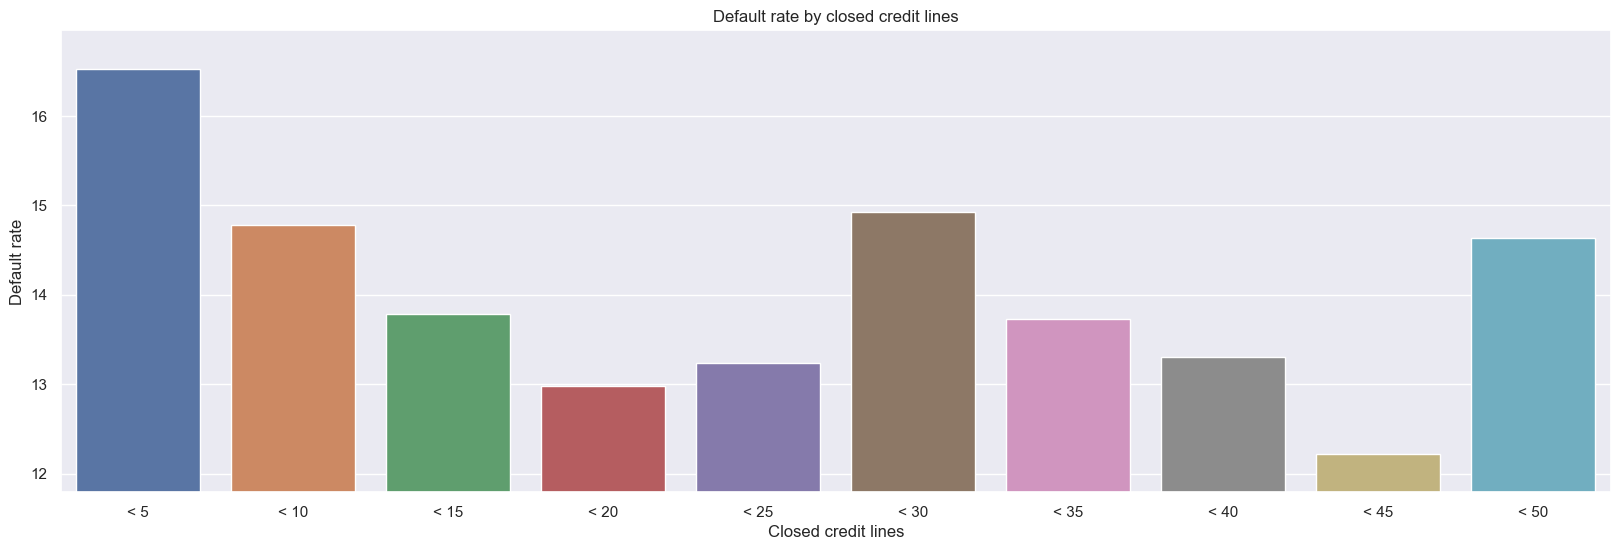

In [1778]:
# create new column closed_acc
loans['closed_acc'] = loans['total_acc'] - loans['open_acc']

# plot default rate by binned closed credit lines
plt.figure(figsize=(20, 6))
default_rate_closed_acc = loans[['closed_acc', 'default']].copy()
# remove outliers for closed_acc
default_rate_closed_acc = default_rate_closed_acc[default_rate_closed_acc['closed_acc'] < 50]
# bin closed_acc using intervals of 5 on column 'closed_acc'
bin_size = 5
bin_edges = range(int(default_rate_closed_acc['closed_acc'].min()), int(default_rate_closed_acc['closed_acc'].max() + bin_size), bin_size)
default_rate_closed_acc['closed_acc_bin'] = pd.cut(default_rate_closed_acc['closed_acc'], bins=bin_edges, include_lowest=True, right=False)
default_rate_closed_acc = default_rate_closed_acc.groupby(['closed_acc_bin']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='closed_acc_bin', y='default', data=default_rate_closed_acc)

# Get the minimum and maximum values from your data
min_val = default_rate_closed_acc['default'].min()
max_val = default_rate_closed_acc['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
bar_plot.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

plt.title('Default rate by closed credit lines')
plt.xlabel('Closed credit lines')
bar_plot.set_xticklabels([f"< {str(interval.right)}" for interval in default_rate_closed_acc['closed_acc_bin']])
plt.ylabel('Default rate')
plt.show()

### Revolving credit utilization (huge impact)

Default rate increases with increase in revolving credit utilization, meaning that people with higher credit utilization are more likely to default on the loan as they have much less margin for error

Number of loans is almost evenly distributed across the credit utilization range which means that lending club is not taking this into account while giving loans.

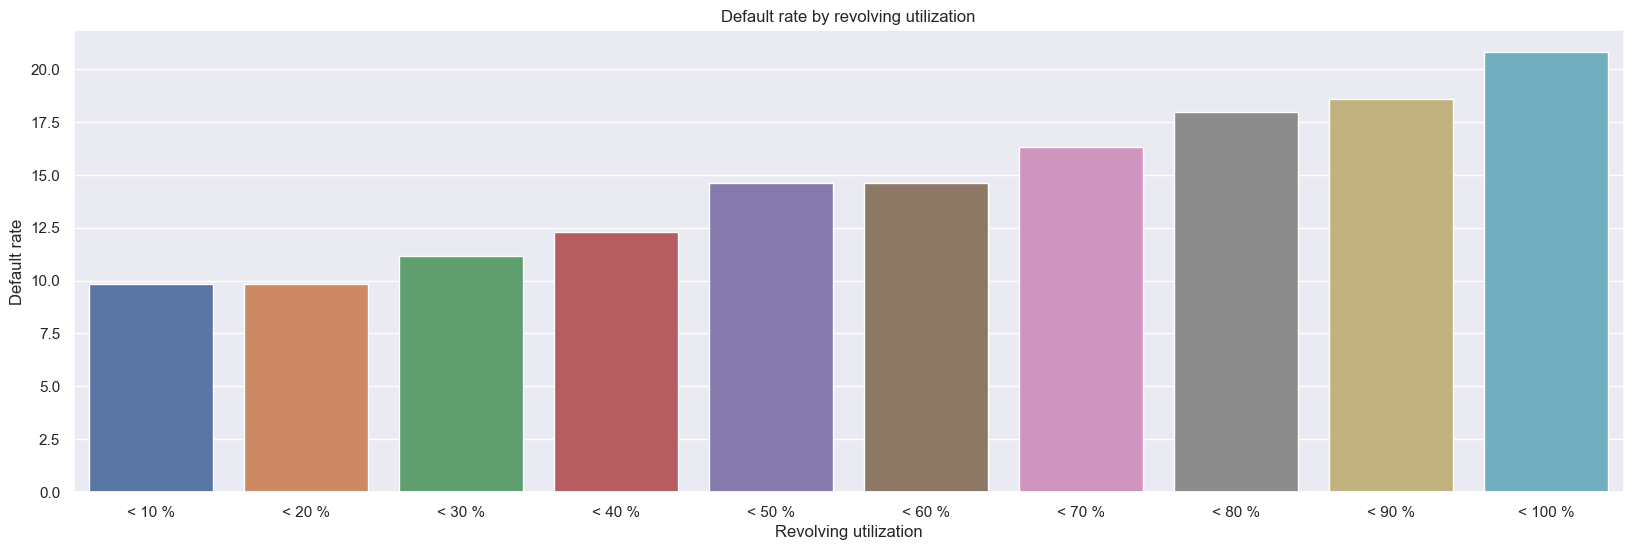

In [1779]:
# plot default rate by binned revol_util
plt.figure(figsize=(20, 6))
default_rate_revol_util = loans[['revol_util', 'default']].copy()

# bin revol_util using intervals of 10 on column 'revol_util'
bin_size = 10
bin_edges = range(int(default_rate_revol_util['revol_util'].min()), int(default_rate_revol_util['revol_util'].max() + bin_size), bin_size)
default_rate_revol_util['revol_util_bin'] = pd.cut(default_rate_revol_util['revol_util'], bins=bin_edges, include_lowest=True, right=False)
default_rate_revol_util = default_rate_revol_util.groupby(['revol_util_bin']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='revol_util_bin', y='default', data=default_rate_revol_util)
plt.title('Default rate by revolving utilization')
plt.xlabel('Revolving utilization')
bar_plot.set_xticklabels([f"< {str(interval.right)} %" for interval in default_rate_revol_util['revol_util_bin']])
plt.ylabel('Default rate')
plt.show()

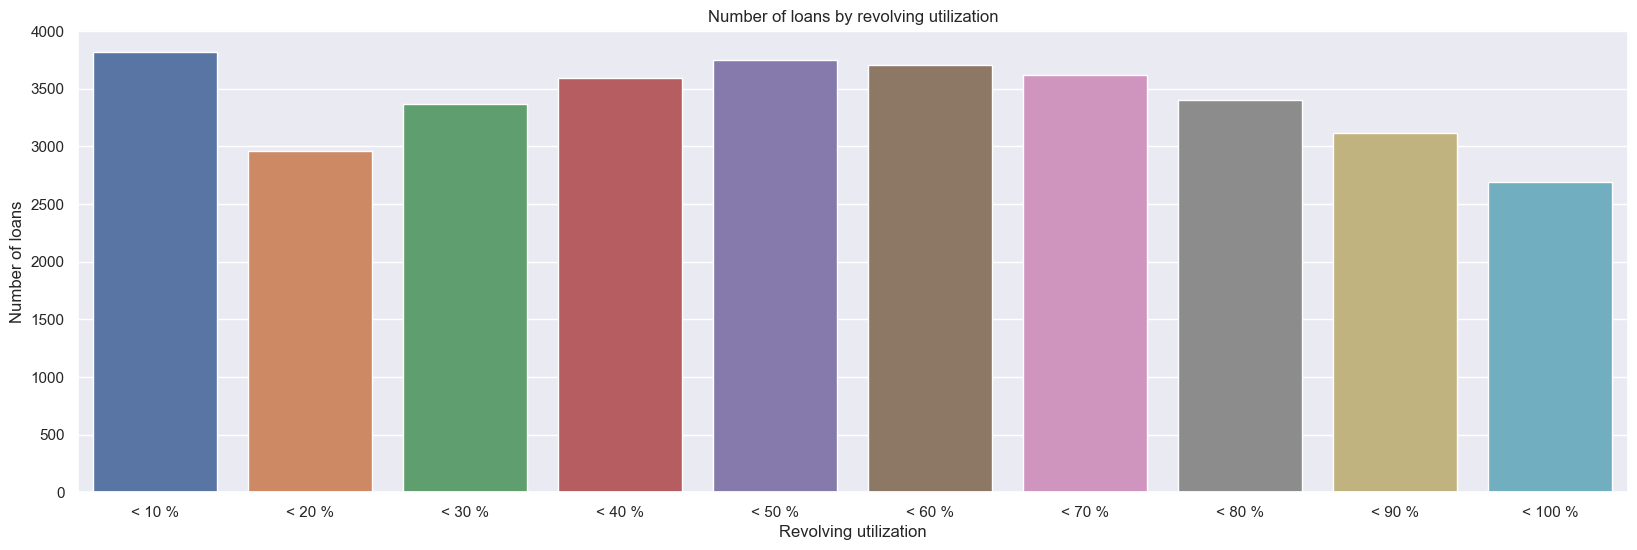

In [1780]:
# plot number of loans by revol_util
plt.figure(figsize=(20, 6))
default_rate_revol_util = loans[['revol_util', 'default']].copy()
# remove outliers for revol_util
default_rate_revol_util = default_rate_revol_util[default_rate_revol_util['revol_util'] < 100]
# bin revol_util using intervals of 10 on column 'revol_util'
bin_size = 10
bin_edges = range(int(default_rate_revol_util['revol_util'].min()), int(default_rate_revol_util['revol_util'].max() + bin_size), bin_size)
default_rate_revol_util['revol_util_bin'] = pd.cut(default_rate_revol_util['revol_util'], bins=bin_edges, include_lowest=True, right=False)
default_rate_revol_util = default_rate_revol_util.groupby(['revol_util_bin']).agg({'default': 'count'}).reset_index()

bar_plot = sns.barplot(x='revol_util_bin', y='default', data=default_rate_revol_util)
plt.title('Number of loans by revolving utilization')
plt.xlabel('Revolving utilization')
bar_plot.set_xticklabels([f"< {str(interval.right)} %" for interval in default_rate_revol_util['revol_util_bin']])
plt.ylabel('Number of loans')
plt.show()

### Number of inquiries (good impact)

Default rate is much higher for people with more inquiries, this could be because they are looking for more loans and worsening their financial situation

0    16594
1     9402
2     4960
3     2589
4      257
5      121
6       47
7       29
8        9
Name: inq_last_6mths, dtype: int64


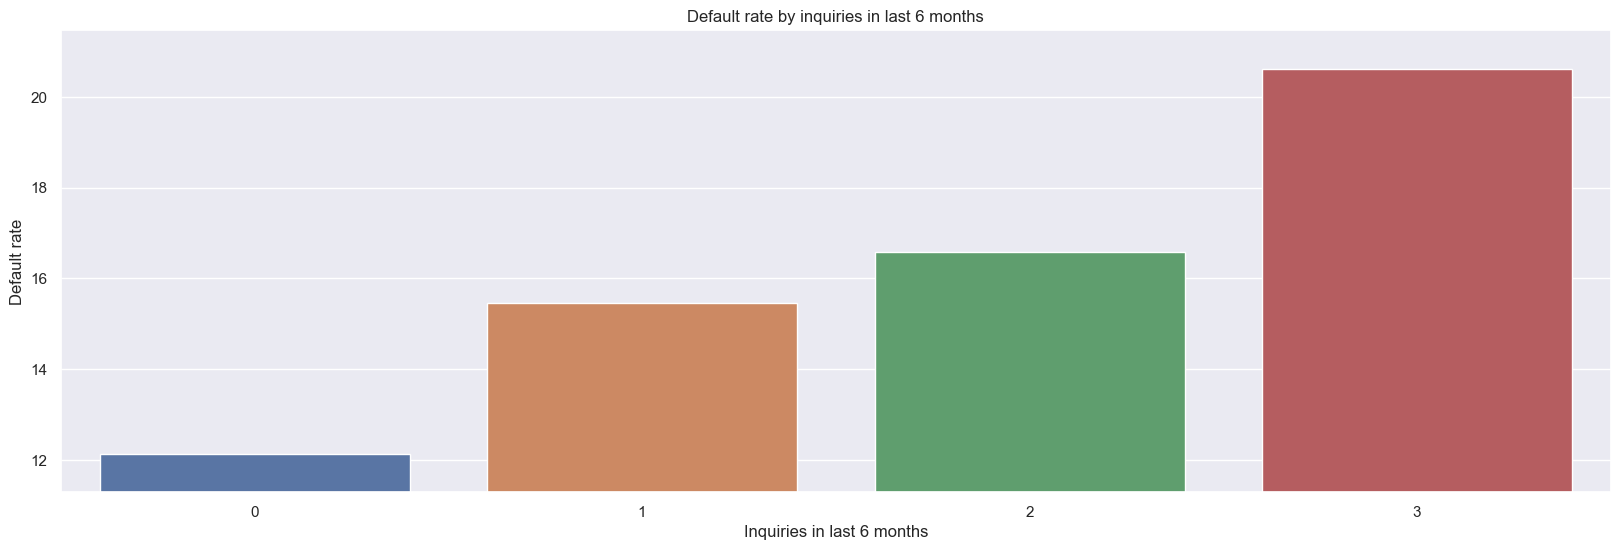

In [1781]:
# plot default rate by inq_last_6mths
plt.figure(figsize=(20, 6))
default_rate_inq_last_6mths = loans[['inq_last_6mths', 'default']].copy()

print(loans['inq_last_6mths'].value_counts())

# remove outliers for inq_last_6mths, for values greater than or equal to 4 as they are very few
default_rate_inq_last_6mths = default_rate_inq_last_6mths[default_rate_inq_last_6mths['inq_last_6mths'] < 4]

default_rate_inq_last_6mths = default_rate_inq_last_6mths.groupby(['inq_last_6mths']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='inq_last_6mths', y='default', data=default_rate_inq_last_6mths)

# Get the minimum and maximum values from your data
min_val = default_rate_inq_last_6mths['default'].min()
max_val = default_rate_inq_last_6mths['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
bar_plot.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

plt.title('Default rate by inquiries in last 6 months')
plt.xlabel('Inquiries in last 6 months')
plt.ylabel('Default rate')
plt.show()


### Delinquencies for past 2 years (good impact)

Default rate increases with increase in delinquencies for past 2 years, meaning that people with more delinquencies are more likely to default on the loan as they have a history of not paying back their loans

0     30363
1      2803
2       569
3       183
4        54
5        18
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64


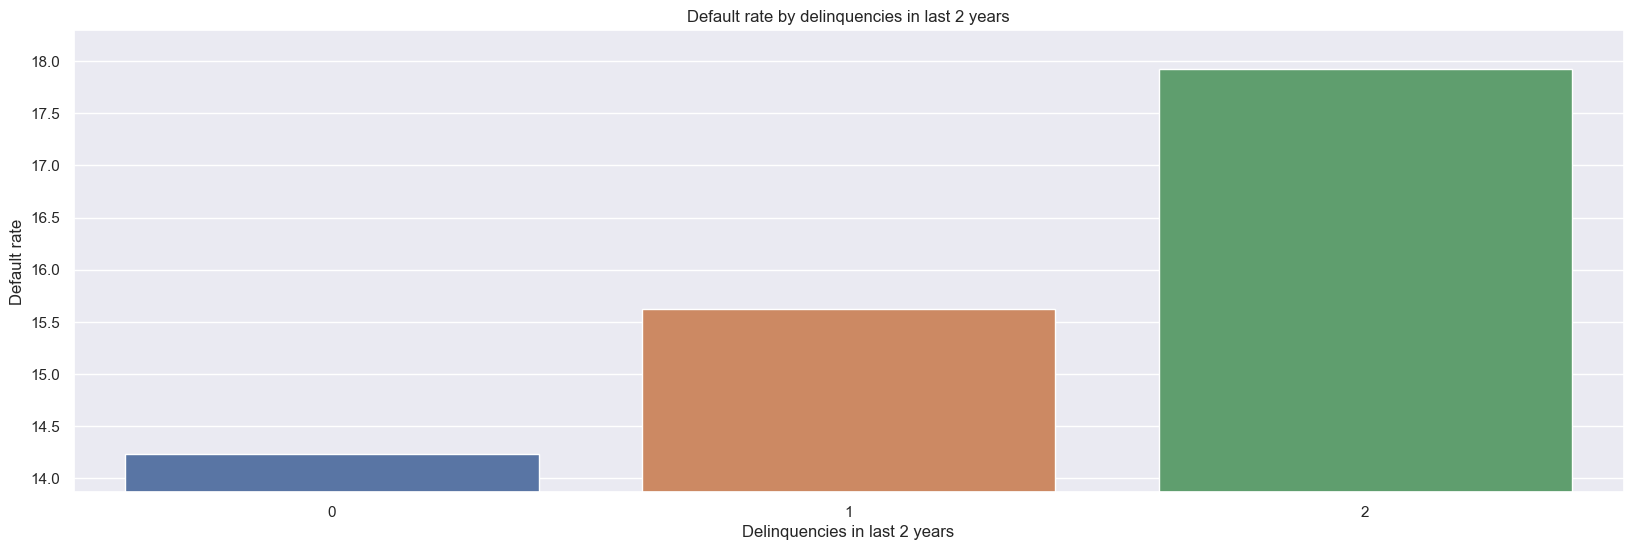

In [1782]:
# plot default rate by delinq_2yrs
plt.figure(figsize=(20, 6))
default_rate_delinq_2yrs = loans[['delinq_2yrs', 'default']].copy()

print(default_rate_delinq_2yrs['delinq_2yrs'].value_counts())

# for values greater than or equal to 3 as they are very few records, so remove them
default_rate_delinq_2yrs = default_rate_delinq_2yrs[default_rate_delinq_2yrs['delinq_2yrs'] < 3]

default_rate_delinq_2yrs = default_rate_delinq_2yrs.groupby(['delinq_2yrs']).agg({'default': 'mean'}).reset_index()

bar_plot = sns.barplot(x='delinq_2yrs', y='default', data=default_rate_delinq_2yrs)

# Get the minimum and maximum values from your data
min_val = default_rate_delinq_2yrs['default'].min()
max_val = default_rate_delinq_2yrs['default'].max()

# Set the limits of y-axis to be slightly beyond the min and max
bar_plot.set_ylim(min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val))

plt.title('Default rate by delinquencies in last 2 years')
plt.xlabel('Delinquencies in last 2 years')
plt.ylabel('Default rate')
plt.show()